# Machine learning and neural network

install packages

In [1]:
!pip install pydot
!pip install graphviz

In [2]:
!pip install tensorflow

## Example: Image Classifier
Images are represented as 3D arrays of numbers, withintegers between [0, 255]. E.g. 300 x 100 x 3

In [3]:
from IPython.display import clear_output, Image, HTML, display

Image(url= "https://i.imgur.com/BAtqITz.jpg", width=500) # from Stanford

In [4]:
def pred():
    #
    #
    #
    return label

Below: The challenges involved from the perspective of a Computer Vision algorithm.  keep in mind the raw representation of images as a 3-D array of brightness values:

* **Viewpoint variation**. A single instance of an object can be oriented in many ways with respect to the camera.
Scale variation. Visual classes often exhibit variation in their size (size in the real world, not only in terms of their extent in the image).
* **Deformation.** Many objects of interest are not rigid bodies and can be deformed in extreme ways.
* **Occlusion.** The objects of interest can be occluded. Sometimes only a small portion of an object (as little as few pixels) could be visible.
* **Illumination conditions.** The effects of illumination are drastic on the pixel level.
* **Background clutter.** The objects of interest may blend into their environment, making them hard to identify.
* **Intra-class variation.** The classes of interest can often be relatively broad, such as chair. There are many different types of these objects, each with their own appearance.

In [5]:
Image(url= "https://i.imgur.com/j5jPEv0.jpg", width=800) # from Stanford

**Solution: data driving methods**

## What is Tensorflow?

In [27]:
Image(url= "https://i.imgur.com/4nk5b4c.jpg", width=700) # from Google

TensorFlow is the flow of tensors in a computational graph.
* Library for defining computation graphs
* Calculating gradients

### Tensors
TensorFlow does have its own data structure for the purpose of performance and ease of use. Tensor is the data structure used in Tensorflow. You can think of a TensorFlow tensor as an n-dimensional array or list.

**Example:**

Tensors have a Shape that’s described with a vectorn $[ 10000, 256, 256, 3 ]$
* 10000 Images
* Each Image has 256 Rows
* Each Row has 256 Pixels
* Each Pixel has 3 channels (RGB)

### Computaional Graph

The biggest idea about Tensorflow is that all the numerical computations are expressed as a computational graph. In other words, the backbone of any Tensorflow program is a Graph. Anything that happens in your model is represented by the computational graph.  

Computational graphs are an abstract way of describing computations as directed graph: 
* The edges correspond to multidimensional arrays (Tensors). 
* The nodes create or manipulate these Tensors according to specific rules (Operations Ops)
  * Operations on tensors (like math operations) 
  * Generating tensors (like variables and constants). 
  

In [28]:
Image(url= "https://i.imgur.com/2Ys4yTu.jpg", width=650)

To implement this model we will use `Keras`. The `Sequential` in `Keras` model is a linear stack of layers.

You can create a Sequential model by passing a list of layer instances to the constructor:

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers

from sklearn import datasets
print(tf.__version__)

2.0.0


In [3]:
np.random.seed(0)
tf.random.set_seed(0)

## Keras models
The model object is how you tell Keras where the model starts and stops: where data comes in and where predictions come out. Build the tf.keras.Sequential model by stacking layers. 

In [4]:
Image(url= "https://i.imgur.com/GtL0Ehr.jpg", width=850)

NameError: name 'Image' is not defined

In [ ]:
# LeNet-5 Architecture
model = keras.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1), name= "Convolution_1"),
    layers.MaxPooling2D((2, 2), name= "Subsampling_1"),
    layers.Conv2D(16, (5, 5), activation='relu', name= "Convolution_2"),
    layers.MaxPooling2D((2, 2) ,name= "Subsampling_2"),
    layers.Flatten(name= "FullyConnection_1"),
    layers.Dense(84, activation='relu', name= "FullyConnection_2"),
    layers.Dense(10, activation='softmax')],
    name='LeNet-5') 

### Summarize the model

The summary will tell you the names of the layers, as well as how many units they have and how many parameters are in the model.

In [5]:
model.summary()

NameError: name 'model' is not defined

### Visualize a model

The plot will show how the layers connect to each other.

In [6]:
#from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(model, to_file ='model.png')
from matplotlib import pyplot as plt
img = plt.imread('model.png')
plt.imshow(img)
plt.show()

NameError: name 'model' is not defined

## Regression:
### Providing the Data

Next up we'll feed in some data. The relationship between $x$ and $y$ is that
$$y = x^3 - 4x^2 - 2^x + 2 + Noise $$

A python library called 'Numpy' provides lots of array type data structures that are a standard way of doing it. 


In [10]:
x = np.arange(0, 10, 0.16)
y = 0.6*x**3 - 5.2*x**2 -3*x + 2
y_noise = y + np.random.normal(0, 1.8, size=(len(x),))

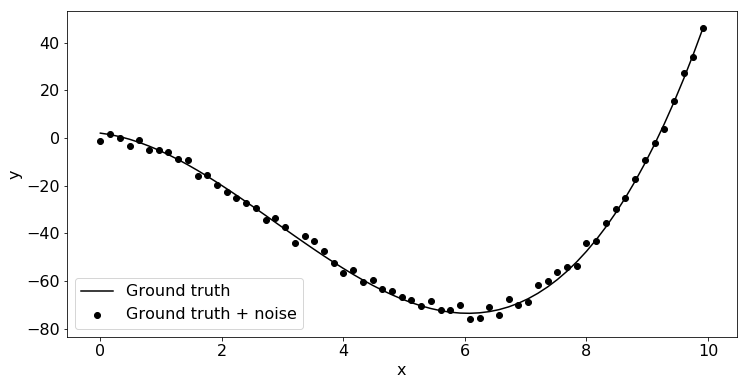

In [11]:
fig = plt.figure (figsize = (12,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x, y_noise, label = "Ground truth + noise", color = 'black')
plt.legend(fontsize = 16, loc = 'lower left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

### Split the data:

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y_noise, test_size=0.25, random_state=42)

print("The number of training data is: ", x_train.shape[0])
print("The number of validation data is: ", x_val.shape[0])

The number of training data is:  47
The number of validation data is:  16


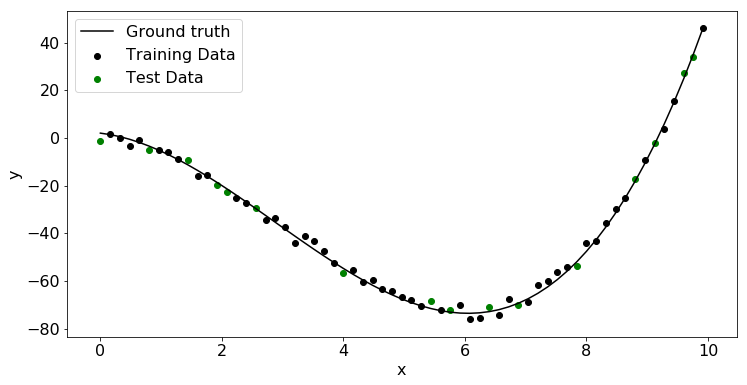

In [13]:
fig = plt.figure (figsize = (12,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x_train, y_train, label = "Training Data", color = 'black')
plt.scatter(x_val, y_val, label = "Test Data", color = 'green')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

## At the Beginning: the Neuron
Making the comparison to the original, biological neurons, we explained in the lecture how scientists developed a simple model to simulate their behavior$^1$.

The mathematical equation for a neuron
$$ y = f(wx) $$

where:
* $x$ : input
* $f$ : activation function
* $w$ : wieght
* $y$ : output

Assuming that there is no activation function, the neuron can approximate a linear function.
$$ y = wx $$

In [17]:
Image(url= "https://i.imgur.com/KKYGVtc.jpg", width=450)

NameError: name 'Image' is not defined

In [18]:
model = keras.Sequential(
    [layers.Dense(input_shape=[1], units= 1,activation=None,use_bias=False)],
    name = 'linear') 
model.summary()

Model: "linear"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


When the computer is trying to 'learn' that, it makes a guess,maybe y=10x. The **LOSS function** measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses the **OPTIMIZER function** to make another guess. Based on how the loss function went, it will try to minimize the loss.

In [19]:
loss = tf.keras.losses.MSE

In [20]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [21]:
metrics=[keras.metrics.MSE]

In [22]:
model.compile(loss=loss, # Loss function to minimize 
              optimizer=optimizer,# Optimizer
              metrics = metrics) # List of metrics to monitor

The process of training the neural network, where it 'learns' the relationship between the $x$ and $y$ is in the `model.fit` call. This is where it will go through the loop making a guess, measuring how good or bad it is, using the opimizer to make another guess etc. It will do it for the number of epochs you specify.

In [23]:
history = model.fit(x, y, epochs=500, batch_size=47,validation_data=(x_val,y_val))
#history = model.fit(x_train, y_train, epochs=200, batch_size=47, validation_data=(x_val, y_val))  

Train on 63 samples, validate on 16 samples
Epoch 1/500
63/63 [==============================] - 1s 18ms/sample - loss: 1960.4026 - mean_squared_error: 1960.4027 - val_loss: 1589.7958 - val_mean_squared_error: 1589.7958
Epoch 2/500
63/63 [==============================] - 0s 248us/sample - loss: 1772.1161 - mean_squared_error: 1772.1161 - val_loss: 1507.4133 - val_mean_squared_error: 1507.4133
Epoch 3/500
63/63 [==============================] - 0s 0s/sample - loss: 1621.8749 - mean_squared_error: 1621.8750 - val_loss: 1450.5259 - val_mean_squared_error: 1450.5259
Epoch 4/500
63/63 [==============================] - 0s 248us/sample - loss: 1500.2921 - mean_squared_error: 1500.2921 - val_loss: 1420.3433 - val_mean_squared_error: 1420.3433
Epoch 5/500
63/63 [==============================] - 0s 248us/sample - loss: 1413.6175 - mean_squared_error: 1413.6174 - val_loss: 1406.3086 - val_mean_squared_error: 1406.3086
Epoch 6/500
63/63 [==============================] - 0s 248us/sample - loss

Epoch 47/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.5528 - mean_squared_error: 1165.5529 - val_loss: 1554.4355 - val_mean_squared_error: 1554.4355
Epoch 48/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.5340 - mean_squared_error: 1165.5339 - val_loss: 1560.6571 - val_mean_squared_error: 1560.6571
Epoch 49/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.6438 - mean_squared_error: 1165.6438 - val_loss: 1569.5737 - val_mean_squared_error: 1569.5737
Epoch 50/500
63/63 [==============================] - 0s 0s/sample - loss: 1165.3727 - mean_squared_error: 1165.3728 - val_loss: 1563.8318 - val_mean_squared_error: 1563.8318
Epoch 51/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.5077 - mean_squared_error: 1165.5077 - val_loss: 1571.5681 - val_mean_squared_error: 1571.5681
Epoch 52/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.3121 - mean_squared_error: 116

63/63 [==============================] - 0s 248us/sample - loss: 1165.2856 - mean_squared_error: 1165.2856 - val_loss: 1563.6599 - val_mean_squared_error: 1563.6599
Epoch 94/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.3195 - mean_squared_error: 1165.3195 - val_loss: 1569.1565 - val_mean_squared_error: 1569.1565
Epoch 95/500
63/63 [==============================] - 0s 248us/sample - loss: 1166.0585 - mean_squared_error: 1166.0585 - val_loss: 1580.3948 - val_mean_squared_error: 1580.3948
Epoch 96/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.2641 - mean_squared_error: 1165.2642 - val_loss: 1578.1831 - val_mean_squared_error: 1578.1831
Epoch 97/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.4351 - mean_squared_error: 1165.4351 - val_loss: 1582.2400 - val_mean_squared_error: 1582.2400
Epoch 98/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.3234 - mean_squared_error: 1165.3234 - v

63/63 [==============================] - 0s 248us/sample - loss: 1165.9818 - mean_squared_error: 1165.9818 - val_loss: 1551.2413 - val_mean_squared_error: 1551.2413
Epoch 140/500
63/63 [==============================] - 0s 0s/sample - loss: 1166.4756 - mean_squared_error: 1166.4757 - val_loss: 1544.1615 - val_mean_squared_error: 1544.1615
Epoch 141/500
63/63 [==============================] - 0s 0s/sample - loss: 1166.5362 - mean_squared_error: 1166.5363 - val_loss: 1556.2200 - val_mean_squared_error: 1556.2200
Epoch 142/500
63/63 [==============================] - 0s 248us/sample - loss: 1166.0563 - mean_squared_error: 1166.0563 - val_loss: 1567.8998 - val_mean_squared_error: 1567.8998
Epoch 143/500
63/63 [==============================] - 0s 248us/sample - loss: 1169.3585 - mean_squared_error: 1169.3584 - val_loss: 1545.3673 - val_mean_squared_error: 1545.3673
Epoch 144/500
63/63 [==============================] - 0s 248us/sample - loss: 1166.3108 - mean_squared_error: 1166.3108 - va

Epoch 185/500
63/63 [==============================] - 0s 248us/sample - loss: 1168.3449 - mean_squared_error: 1168.3448 - val_loss: 1580.9954 - val_mean_squared_error: 1580.9954
Epoch 186/500
63/63 [==============================] - 0s 248us/sample - loss: 1168.0926 - mean_squared_error: 1168.0927 - val_loss: 1599.2415 - val_mean_squared_error: 1599.2415
Epoch 187/500
63/63 [==============================] - 0s 0s/sample - loss: 1168.0368 - mean_squared_error: 1168.0369 - val_loss: 1611.2562 - val_mean_squared_error: 1611.2562
Epoch 188/500
63/63 [==============================] - 0s 248us/sample - loss: 1167.9438 - mean_squared_error: 1167.9438 - val_loss: 1592.3468 - val_mean_squared_error: 1592.3468
Epoch 189/500
63/63 [==============================] - 0s 248us/sample - loss: 1166.1294 - mean_squared_error: 1166.1295 - val_loss: 1595.9625 - val_mean_squared_error: 1595.9625
Epoch 190/500
63/63 [==============================] - 0s 248us/sample - loss: 1167.6139 - mean_squared_erro

Epoch 231/500
63/63 [==============================] - 0s 0s/sample - loss: 1166.3556 - mean_squared_error: 1166.3557 - val_loss: 1599.1672 - val_mean_squared_error: 1599.1672
Epoch 232/500
63/63 [==============================] - 0s 248us/sample - loss: 1166.1807 - mean_squared_error: 1166.1807 - val_loss: 1591.7592 - val_mean_squared_error: 1591.7592
Epoch 233/500
63/63 [==============================] - 0s 248us/sample - loss: 1166.3659 - mean_squared_error: 1166.3658 - val_loss: 1578.1813 - val_mean_squared_error: 1578.1813
Epoch 234/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.3800 - mean_squared_error: 1165.3800 - val_loss: 1581.5171 - val_mean_squared_error: 1581.5171
Epoch 235/500
63/63 [==============================] - 0s 0s/sample - loss: 1165.6432 - mean_squared_error: 1165.6432 - val_loss: 1586.4321 - val_mean_squared_error: 1586.4321
Epoch 236/500
63/63 [==============================] - 0s 248us/sample - loss: 1166.0814 - mean_squared_error: 

Epoch 277/500
63/63 [==============================] - 0s 248us/sample - loss: 1169.0803 - mean_squared_error: 1169.0802 - val_loss: 1613.9636 - val_mean_squared_error: 1613.9636
Epoch 278/500
63/63 [==============================] - 0s 0s/sample - loss: 1167.4160 - mean_squared_error: 1167.4160 - val_loss: 1602.7766 - val_mean_squared_error: 1602.7766
Epoch 279/500
63/63 [==============================] - 0s 248us/sample - loss: 1170.4327 - mean_squared_error: 1170.4326 - val_loss: 1572.6533 - val_mean_squared_error: 1572.6533
Epoch 280/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.2196 - mean_squared_error: 1165.2196 - val_loss: 1575.5593 - val_mean_squared_error: 1575.5593
Epoch 281/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.3832 - mean_squared_error: 1165.3831 - val_loss: 1580.0103 - val_mean_squared_error: 1580.0103
Epoch 282/500
63/63 [==============================] - 0s 0s/sample - loss: 1166.1363 - mean_squared_error: 

Epoch 323/500
63/63 [==============================] - 0s 248us/sample - loss: 1167.7299 - mean_squared_error: 1167.7299 - val_loss: 1607.0425 - val_mean_squared_error: 1607.0425
Epoch 324/500
63/63 [==============================] - 0s 248us/sample - loss: 1167.6246 - mean_squared_error: 1167.6246 - val_loss: 1588.7297 - val_mean_squared_error: 1588.7297
Epoch 325/500
63/63 [==============================] - 0s 0s/sample - loss: 1166.8045 - mean_squared_error: 1166.8046 - val_loss: 1598.8915 - val_mean_squared_error: 1598.8915
Epoch 326/500
63/63 [==============================] - 0s 0s/sample - loss: 1166.2795 - mean_squared_error: 1166.2795 - val_loss: 1598.3406 - val_mean_squared_error: 1598.3406
Epoch 327/500
63/63 [==============================] - 0s 248us/sample - loss: 1166.2856 - mean_squared_error: 1166.2856 - val_loss: 1587.8939 - val_mean_squared_error: 1587.8939
Epoch 328/500
63/63 [==============================] - 0s 248us/sample - loss: 1168.0819 - mean_squared_error: 

Epoch 369/500
63/63 [==============================] - 0s 248us/sample - loss: 1166.6510 - mean_squared_error: 1166.6509 - val_loss: 1596.2229 - val_mean_squared_error: 1596.2229
Epoch 370/500
63/63 [==============================] - 0s 248us/sample - loss: 1166.8236 - mean_squared_error: 1166.8236 - val_loss: 1602.9576 - val_mean_squared_error: 1602.9576
Epoch 371/500
63/63 [==============================] - 0s 248us/sample - loss: 1166.6895 - mean_squared_error: 1166.6895 - val_loss: 1590.5735 - val_mean_squared_error: 1590.5735
Epoch 372/500
63/63 [==============================] - 0s 248us/sample - loss: 1168.0580 - mean_squared_error: 1168.0580 - val_loss: 1568.5520 - val_mean_squared_error: 1568.5520
Epoch 373/500
63/63 [==============================] - 0s 0s/sample - loss: 1165.1375 - mean_squared_error: 1165.1376 - val_loss: 1570.2861 - val_mean_squared_error: 1570.2861
Epoch 374/500
63/63 [==============================] - 0s 0s/sample - loss: 1167.2653 - mean_squared_error: 

Epoch 415/500
63/63 [==============================] - 0s 248us/sample - loss: 1167.6152 - mean_squared_error: 1167.6152 - val_loss: 1576.7349 - val_mean_squared_error: 1576.7349
Epoch 416/500
63/63 [==============================] - 0s 248us/sample - loss: 1167.4646 - mean_squared_error: 1167.4646 - val_loss: 1593.5073 - val_mean_squared_error: 1593.5073
Epoch 417/500
63/63 [==============================] - 0s 248us/sample - loss: 1166.1805 - mean_squared_error: 1166.1805 - val_loss: 1581.9072 - val_mean_squared_error: 1581.9072
Epoch 418/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.9941 - mean_squared_error: 1165.9940 - val_loss: 1589.7087 - val_mean_squared_error: 1589.7087
Epoch 419/500
63/63 [==============================] - 0s 0s/sample - loss: 1166.4275 - mean_squared_error: 1166.4275 - val_loss: 1575.3660 - val_mean_squared_error: 1575.3660
Epoch 420/500
63/63 [==============================] - 0s 0s/sample - loss: 1167.8417 - mean_squared_error: 

Epoch 461/500
63/63 [==============================] - 0s 248us/sample - loss: 1166.1710 - mean_squared_error: 1166.1711 - val_loss: 1545.4844 - val_mean_squared_error: 1545.4844
Epoch 462/500
63/63 [==============================] - 0s 0s/sample - loss: 1166.8871 - mean_squared_error: 1166.8872 - val_loss: 1560.2445 - val_mean_squared_error: 1560.2445
Epoch 463/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.6616 - mean_squared_error: 1165.6616 - val_loss: 1569.2262 - val_mean_squared_error: 1569.2262
Epoch 464/500
63/63 [==============================] - 0s 248us/sample - loss: 1166.4872 - mean_squared_error: 1166.4872 - val_loss: 1556.0498 - val_mean_squared_error: 1556.0498
Epoch 465/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.5966 - mean_squared_error: 1165.5966 - val_loss: 1563.7513 - val_mean_squared_error: 1563.7513
Epoch 466/500
63/63 [==============================] - 0s 248us/sample - loss: 1165.2148 - mean_squared_erro

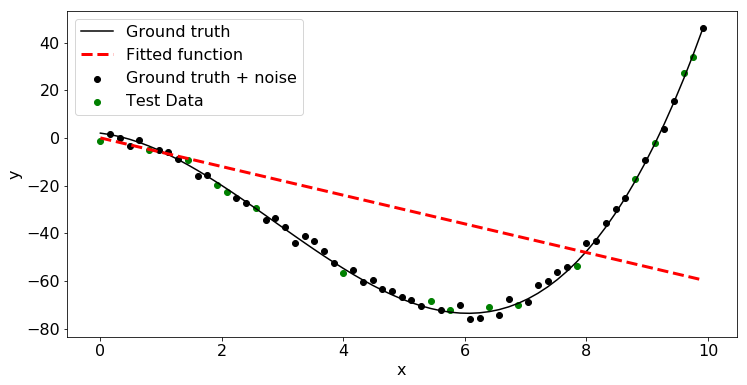

In [24]:
fig = plt.figure (figsize = (12,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x_train, y_train, label = "Ground truth + noise", color = 'black')
plt.scatter(x_val, y_val, label = "Test Data", color = 'green')
plt.plot(x, model.predict(x), color = 'red', ls = '--', lw = 3, 
         label = 'Fitted function')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

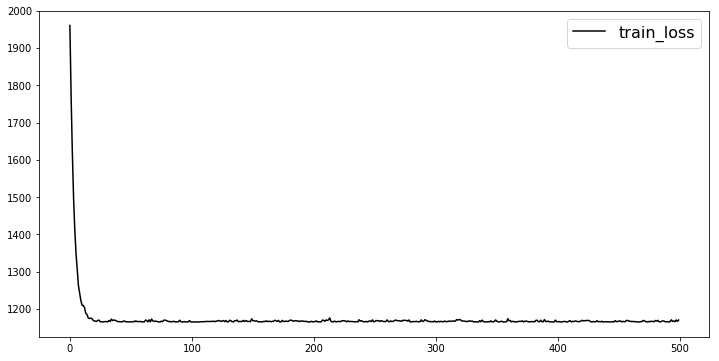

In [25]:
# The returned "history" object holds a record
# of the loss values and metric values during training
fig = plt.figure (figsize = (12,6))
plt.plot(history.history['loss'], label = "train_loss", color = 'black')
plt.legend(fontsize = 16, loc = 'upper right')
#print('\nhistory dict:', history.history)

In [26]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-6.0156164]], dtype=float32)>]

## How we can reduce the loss:

### Usage of bias:
We will create a neural network. It has also 1 layer, and that layer has 1 neuron and bias. The model that can be represented by this network is: 
$$ y = wx + b$$

In [28]:
Image(url= "https://i.imgur.com/lPDTbj0.jpg", width=500)

NameError: name 'Image' is not defined

In [29]:
model = keras.Sequential([layers.Dense(input_shape=[1], units= 1,use_bias=True)])
                          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [30]:
loss = tf.keras.losses.MSE
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
metrics=[keras.metrics.MSE]
model.compile(loss=loss, # Loss function to minimize 
              optimizer=optimizer,# Optimizer
              merics = metrics) # List of metrics to monitor

In [31]:
history = model.fit(x_train, y_train, epochs=500, batch_size=47, validation_data=(x_val, y_val))

Train on 47 samples, validate on 16 samples
Epoch 1/500
47/47 [==============================] - 0s 8ms/sample - loss: 2373.0815 - val_loss: 1818.0779
Epoch 2/500
47/47 [==============================] - 0s 332us/sample - loss: 2197.6072 - val_loss: 1722.9204
Epoch 3/500
47/47 [==============================] - 0s 0s/sample - loss: 2044.1478 - val_loss: 1644.7581
Epoch 4/500
47/47 [==============================] - 0s 0s/sample - loss: 1909.9385 - val_loss: 1581.1266
Epoch 5/500
47/47 [==============================] - 0s 332us/sample - loss: 1792.5619 - val_loss: 1529.8926
Epoch 6/500
47/47 [==============================] - 0s 0s/sample - loss: 1689.9034 - val_loss: 1489.2107
Epoch 7/500
47/47 [==============================] - 0s 332us/sample - loss: 1600.1154 - val_loss: 1457.4857
Epoch 8/500
47/47 [==============================] - 0s 0s/sample - loss: 1521.5812 - val_loss: 1433.3406
Epoch 9/500
47/47 [==============================] - 0s 0s/sample - loss: 1452.8870 - val_loss: 14

Epoch 77/500
47/47 [==============================] - 0s 0s/sample - loss: 963.9711 - val_loss: 1656.8473
Epoch 78/500
47/47 [==============================] - 0s 332us/sample - loss: 963.7944 - val_loss: 1657.0881
Epoch 79/500
47/47 [==============================] - 0s 0s/sample - loss: 963.6188 - val_loss: 1657.2971
Epoch 80/500
47/47 [==============================] - 0s 0s/sample - loss: 963.4440 - val_loss: 1657.4762
Epoch 81/500
47/47 [==============================] - 0s 332us/sample - loss: 963.2700 - val_loss: 1657.6272
Epoch 82/500
47/47 [==============================] - 0s 0s/sample - loss: 963.0967 - val_loss: 1657.7517
Epoch 83/500
47/47 [==============================] - 0s 332us/sample - loss: 962.9241 - val_loss: 1657.8521
Epoch 84/500
47/47 [==============================] - 0s 0s/sample - loss: 962.7521 - val_loss: 1657.9293
Epoch 85/500
47/47 [==============================] - 0s 0s/sample - loss: 962.5806 - val_loss: 1657.9854
Epoch 86/500
47/47 [=================

Epoch 153/500
47/47 [==============================] - 0s 0s/sample - loss: 951.4430 - val_loss: 1645.3842
Epoch 154/500
47/47 [==============================] - 0s 332us/sample - loss: 951.2847 - val_loss: 1645.1431
Epoch 155/500
47/47 [==============================] - 0s 0s/sample - loss: 951.1266 - val_loss: 1644.9019
Epoch 156/500
47/47 [==============================] - 0s 332us/sample - loss: 950.9688 - val_loss: 1644.6606
Epoch 157/500
47/47 [==============================] - 0s 0s/sample - loss: 950.8110 - val_loss: 1644.4197
Epoch 158/500
47/47 [==============================] - 0s 0s/sample - loss: 950.6534 - val_loss: 1644.1786
Epoch 159/500
47/47 [==============================] - 0s 332us/sample - loss: 950.4958 - val_loss: 1643.9376
Epoch 160/500
47/47 [==============================] - 0s 0s/sample - loss: 950.3386 - val_loss: 1643.6968
Epoch 161/500
47/47 [==============================] - 0s 332us/sample - loss: 950.1815 - val_loss: 1643.4557
Epoch 162/500
47/47 [====

Epoch 229/500
47/47 [==============================] - 0s 0s/sample - loss: 939.8380 - val_loss: 1627.4485
Epoch 230/500
47/47 [==============================] - 0s 333us/sample - loss: 939.6907 - val_loss: 1627.2195
Epoch 231/500
47/47 [==============================] - 0s 0s/sample - loss: 939.5437 - val_loss: 1626.9910
Epoch 232/500
47/47 [==============================] - 0s 332us/sample - loss: 939.3968 - val_loss: 1626.7622
Epoch 233/500
47/47 [==============================] - 0s 332us/sample - loss: 939.2501 - val_loss: 1626.5338
Epoch 234/500
47/47 [==============================] - 0s 0s/sample - loss: 939.1034 - val_loss: 1626.3057
Epoch 235/500
47/47 [==============================] - 0s 333us/sample - loss: 938.9570 - val_loss: 1626.0778
Epoch 236/500
47/47 [==============================] - 0s 0s/sample - loss: 938.8107 - val_loss: 1625.8501
Epoch 237/500
47/47 [==============================] - 0s 332us/sample - loss: 938.6645 - val_loss: 1625.6223
Epoch 238/500
47/47 [=

Epoch 305/500
47/47 [==============================] - 0s 332us/sample - loss: 929.0432 - val_loss: 1610.5881
Epoch 306/500
47/47 [==============================] - 0s 333us/sample - loss: 928.9062 - val_loss: 1610.3733
Epoch 307/500
47/47 [==============================] - 0s 0s/sample - loss: 928.7695 - val_loss: 1610.1589
Epoch 308/500
47/47 [==============================] - 0s 332us/sample - loss: 928.6328 - val_loss: 1609.9446
Epoch 309/500
47/47 [==============================] - 0s 0s/sample - loss: 928.4963 - val_loss: 1609.7305
Epoch 310/500
47/47 [==============================] - 0s 333us/sample - loss: 928.3600 - val_loss: 1609.5164
Epoch 311/500
47/47 [==============================] - 0s 332us/sample - loss: 928.2238 - val_loss: 1609.3026
Epoch 312/500
47/47 [==============================] - 0s 0s/sample - loss: 928.0876 - val_loss: 1609.0889
Epoch 313/500
47/47 [==============================] - 0s 394us/sample - loss: 927.9517 - val_loss: 1608.8756
Epoch 314/500
47/47

Epoch 381/500
47/47 [==============================] - 0s 332us/sample - loss: 919.0021 - val_loss: 1594.7754
Epoch 382/500
47/47 [==============================] - 0s 0s/sample - loss: 918.8747 - val_loss: 1594.5740
Epoch 383/500
47/47 [==============================] - 0s 332us/sample - loss: 918.7475 - val_loss: 1594.3728
Epoch 384/500
47/47 [==============================] - 0s 332us/sample - loss: 918.6205 - val_loss: 1594.1718
Epoch 385/500
47/47 [==============================] - 0s 0s/sample - loss: 918.4936 - val_loss: 1593.9708
Epoch 386/500
47/47 [==============================] - 0s 332us/sample - loss: 918.3667 - val_loss: 1593.7701
Epoch 387/500
47/47 [==============================] - 0s 0s/sample - loss: 918.2399 - val_loss: 1593.5697
Epoch 388/500
47/47 [==============================] - 0s 0s/sample - loss: 918.1133 - val_loss: 1593.3693
Epoch 389/500
47/47 [==============================] - 0s 333us/sample - loss: 917.9869 - val_loss: 1593.1692
Epoch 390/500
47/47 [=

Epoch 457/500
47/47 [==============================] - 0s 332us/sample - loss: 909.6622 - val_loss: 1579.9421
Epoch 458/500
47/47 [==============================] - 0s 332us/sample - loss: 909.5437 - val_loss: 1579.7532
Epoch 459/500
47/47 [==============================] - 0s 0s/sample - loss: 909.4254 - val_loss: 1579.5645
Epoch 460/500
47/47 [==============================] - 0s 333us/sample - loss: 909.3072 - val_loss: 1579.3759
Epoch 461/500
47/47 [==============================] - 0s 0s/sample - loss: 909.1891 - val_loss: 1579.1874
Epoch 462/500
47/47 [==============================] - 0s 332us/sample - loss: 909.0710 - val_loss: 1578.9990
Epoch 463/500
47/47 [==============================] - 0s 333us/sample - loss: 908.9533 - val_loss: 1578.8110
Epoch 464/500
47/47 [==============================] - 0s 0s/sample - loss: 908.8354 - val_loss: 1578.6229
Epoch 465/500
47/47 [==============================] - 0s 332us/sample - loss: 908.7178 - val_loss: 1578.4353
Epoch 466/500
47/47

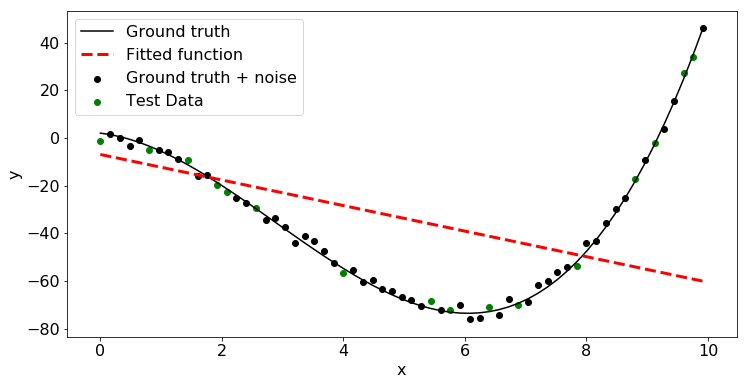

In [32]:
fig = plt.figure (figsize = (12,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x_train, y_train, label = "Ground truth + noise", color = 'black')
plt.scatter(x_val, y_val, label = "Test Data", color = 'green')
plt.plot(x, model.predict(x), color = 'red', ls = '--', lw = 3, 
         label = 'Fitted function')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

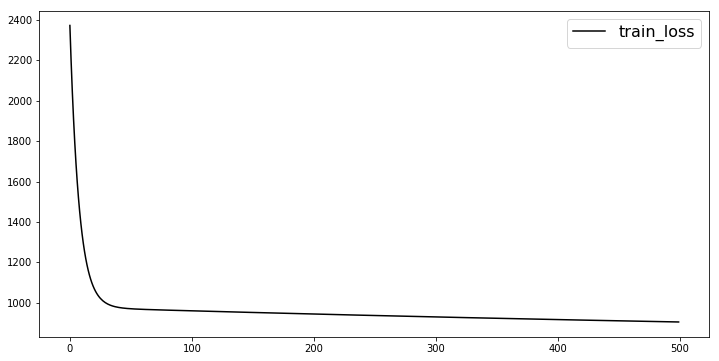

In [33]:
# The returned "history" object holds a record
# of the loss values and metric values during training
fig = plt.figure (figsize = (12,6))
plt.plot(history.history['loss'], label = "train_loss", color = 'black')
plt.legend(fontsize = 16, loc = 'upper right')
#print('\nhistory dict:', history.history)

In [34]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-5.3626575]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-6.9558344], dtype=float32)>]

### Usage of initializers

Initializations define the way to set the initial random weights of Keras layers.

The keyword arguments used for passing initializers to layers will depend on the layer. Usually it is simply `kernel_initializer` and `bias_initializer`:

In [46]:
model = keras.Sequential([layers.Dense(input_shape=[1], units= 1,use_bias=True,
                                      kernel_initializer = keras.initializers.Constant(value=-6. ),
                                      bias_initializer = keras.initializers.Constant(value= -8.),
                                      )])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-6.]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([-8.], dtype=float32)>]

In [48]:
loss = tf.keras.losses.MSE
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
metrics=[keras.metrics.MSE]
model.compile(loss=loss, # Loss function to minimize 
              optimizer=optimizer,# Optimizer
              merics = metrics) # List of metrics to monitor

In [49]:
history = model.fit(x_train, y_train, epochs=500, batch_size=47, validation_data=(x_val, y_val))

Train on 47 samples, validate on 16 samples
Epoch 1/500
47/47 [==============================] - 0s 3ms/sample - loss: 915.0814 - val_loss: 1726.1721
Epoch 2/500
47/47 [==============================] - 0s 332us/sample - loss: 912.4313 - val_loss: 1713.7014
Epoch 3/500
47/47 [==============================] - 0s 0s/sample - loss: 910.1013 - val_loss: 1702.1875
Epoch 4/500
47/47 [==============================] - 0s 332us/sample - loss: 908.0505 - val_loss: 1691.5479
Epoch 5/500
47/47 [==============================] - 0s 0s/sample - loss: 906.2445 - val_loss: 1681.7090
Epoch 6/500
47/47 [==============================] - 0s 0s/sample - loss: 904.6524 - val_loss: 1672.6035
Epoch 7/500
47/47 [==============================] - 0s 332us/sample - loss: 903.2473 - val_loss: 1664.1709
Epoch 8/500
47/47 [==============================] - 0s 0s/sample - loss: 902.0057 - val_loss: 1656.3552
Epoch 9/500
47/47 [==============================] - 0s 332us/sample - loss: 900.9069 - val_loss: 1649.107

Epoch 77/500
47/47 [==============================] - 0s 0s/sample - loss: 887.1609 - val_loss: 1544.5295
Epoch 78/500
47/47 [==============================] - 0s 332us/sample - loss: 887.0638 - val_loss: 1544.3118
Epoch 79/500
47/47 [==============================] - 0s 333us/sample - loss: 886.9667 - val_loss: 1544.0981
Epoch 80/500
47/47 [==============================] - 0s 0s/sample - loss: 886.8699 - val_loss: 1543.8882
Epoch 81/500
47/47 [==============================] - 0s 332us/sample - loss: 886.7731 - val_loss: 1543.6816
Epoch 82/500
47/47 [==============================] - 0s 0s/sample - loss: 886.6765 - val_loss: 1543.4784
Epoch 83/500
47/47 [==============================] - 0s 332us/sample - loss: 886.5797 - val_loss: 1543.2781
Epoch 84/500
47/47 [==============================] - 0s 332us/sample - loss: 886.4832 - val_loss: 1543.0808
Epoch 85/500
47/47 [==============================] - 0s 0s/sample - loss: 886.3868 - val_loss: 1542.8864
Epoch 86/500
47/47 [===========

Epoch 153/500
47/47 [==============================] - 0s 332us/sample - loss: 880.0435 - val_loss: 1531.9360
Epoch 154/500
47/47 [==============================] - 0s 0s/sample - loss: 879.9533 - val_loss: 1531.7866
Epoch 155/500
47/47 [==============================] - 0s 333us/sample - loss: 879.8630 - val_loss: 1531.6375
Epoch 156/500
47/47 [==============================] - 0s 0s/sample - loss: 879.7730 - val_loss: 1531.4884
Epoch 157/500
47/47 [==============================] - 0s 0s/sample - loss: 879.6830 - val_loss: 1531.3394
Epoch 158/500
47/47 [==============================] - 0s 333us/sample - loss: 879.5931 - val_loss: 1531.1908
Epoch 159/500
47/47 [==============================] - 0s 0s/sample - loss: 879.5032 - val_loss: 1531.0421
Epoch 160/500
47/47 [==============================] - 0s 332us/sample - loss: 879.4136 - val_loss: 1530.8934
Epoch 161/500
47/47 [==============================] - 0s 0s/sample - loss: 879.3239 - val_loss: 1530.7454
Epoch 162/500
47/47 [====

Epoch 229/500
47/47 [==============================] - 0s 0s/sample - loss: 873.4237 - val_loss: 1520.9507
Epoch 230/500
47/47 [==============================] - 0s 333us/sample - loss: 873.3398 - val_loss: 1520.8109
Epoch 231/500
47/47 [==============================] - 0s 0s/sample - loss: 873.2559 - val_loss: 1520.6710
Epoch 232/500
47/47 [==============================] - 0s 0s/sample - loss: 873.1721 - val_loss: 1520.5312
Epoch 233/500
47/47 [==============================] - 0s 332us/sample - loss: 873.0884 - val_loss: 1520.3918
Epoch 234/500
47/47 [==============================] - 0s 0s/sample - loss: 873.0048 - val_loss: 1520.2522
Epoch 235/500
47/47 [==============================] - 0s 333us/sample - loss: 872.9212 - val_loss: 1520.1130
Epoch 236/500
47/47 [==============================] - 0s 0s/sample - loss: 872.8378 - val_loss: 1519.9736
Epoch 237/500
47/47 [==============================] - 0s 332us/sample - loss: 872.7544 - val_loss: 1519.8345
Epoch 238/500
47/47 [====

Epoch 305/500
47/47 [==============================] - 0s 0s/sample - loss: 867.2661 - val_loss: 1510.6365
Epoch 306/500
47/47 [==============================] - 0s 0s/sample - loss: 867.1881 - val_loss: 1510.5049
Epoch 307/500
47/47 [==============================] - 0s 333us/sample - loss: 867.1101 - val_loss: 1510.3737
Epoch 308/500
47/47 [==============================] - 0s 0s/sample - loss: 867.0321 - val_loss: 1510.2424
Epoch 309/500
47/47 [==============================] - 0s 333us/sample - loss: 866.9543 - val_loss: 1510.1113
Epoch 310/500
47/47 [==============================] - 0s 332us/sample - loss: 866.8764 - val_loss: 1509.9803
Epoch 311/500
47/47 [==============================] - 0s 0s/sample - loss: 866.7987 - val_loss: 1509.8494
Epoch 312/500
47/47 [==============================] - 0s 332us/sample - loss: 866.7211 - val_loss: 1509.7185
Epoch 313/500
47/47 [==============================] - 0s 0s/sample - loss: 866.6434 - val_loss: 1509.5878
Epoch 314/500
47/47 [====

Epoch 381/500
47/47 [==============================] - 0s 332us/sample - loss: 861.5385 - val_loss: 1500.9448
Epoch 382/500
47/47 [==============================] - 0s 0s/sample - loss: 861.4659 - val_loss: 1500.8213
Epoch 383/500
47/47 [==============================] - 0s 332us/sample - loss: 861.3933 - val_loss: 1500.6980
Epoch 384/500
47/47 [==============================] - 0s 0s/sample - loss: 861.3208 - val_loss: 1500.5745
Epoch 385/500
47/47 [==============================] - 0s 332us/sample - loss: 861.2484 - val_loss: 1500.4514
Epoch 386/500
47/47 [==============================] - 0s 332us/sample - loss: 861.1760 - val_loss: 1500.3281
Epoch 387/500
47/47 [==============================] - 0s 0s/sample - loss: 861.1037 - val_loss: 1500.2052
Epoch 388/500
47/47 [==============================] - 0s 333us/sample - loss: 861.0316 - val_loss: 1500.0820
Epoch 389/500
47/47 [==============================] - 0s 0s/sample - loss: 860.9594 - val_loss: 1499.9592
Epoch 390/500
47/47 [=

Epoch 457/500
47/47 [==============================] - 0s 332us/sample - loss: 856.2109 - val_loss: 1491.8359
Epoch 458/500
47/47 [==============================] - 0s 332us/sample - loss: 856.1432 - val_loss: 1491.7197
Epoch 459/500
47/47 [==============================] - 0s 0s/sample - loss: 856.0758 - val_loss: 1491.6038
Epoch 460/500
47/47 [==============================] - 0s 333us/sample - loss: 856.0082 - val_loss: 1491.4877
Epoch 461/500
47/47 [==============================] - 0s 0s/sample - loss: 855.9408 - val_loss: 1491.3718
Epoch 462/500
47/47 [==============================] - 0s 332us/sample - loss: 855.8737 - val_loss: 1491.2561
Epoch 463/500
47/47 [==============================] - 0s 0s/sample - loss: 855.8063 - val_loss: 1491.1406
Epoch 464/500
47/47 [==============================] - 0s 0s/sample - loss: 855.7392 - val_loss: 1491.0248
Epoch 465/500
47/47 [==============================] - 0s 333us/sample - loss: 855.6721 - val_loss: 1490.9093
Epoch 466/500
47/47 [=

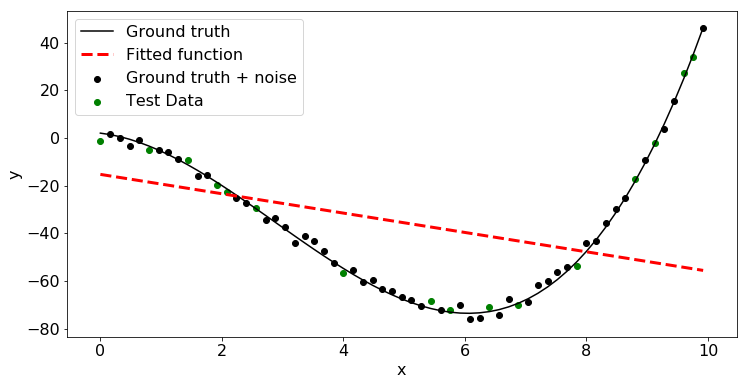

In [39]:
fig = plt.figure (figsize = (12,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x_train, y_train, label = "Ground truth + noise", color = 'black')
plt.scatter(x_val, y_val, label = "Test Data", color = 'green')
plt.plot(x, model.predict(x), color = 'red', ls = '--', lw = 3, 
         label = 'Fitted function')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

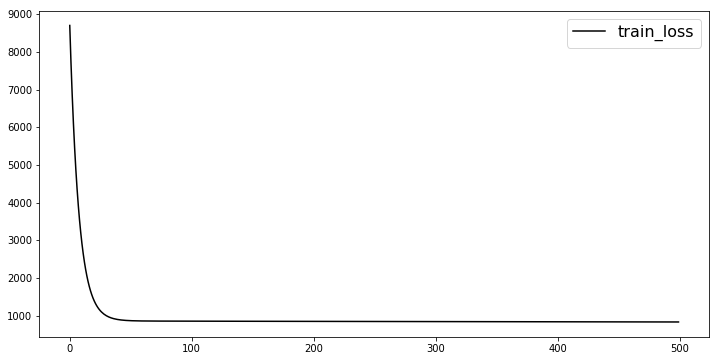

In [40]:
# The returned "history" object holds a record
# of the loss values and metric values during training
fig = plt.figure (figsize = (12,6))
plt.plot(history.history['loss'], label = "train_loss", color = 'black')
plt.legend(fontsize = 16, loc = 'upper right')
#print('\nhistory dict:', history.history)

In [41]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-4.0622787]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-15.310238], dtype=float32)>]

**Task: Try to initialize the model with the weight and bias, which can make the loss as low as possible.
How to do it????**

### Usage of other loss function

#### Mean Squared Error (MSE)

It is perhaps the most simple and common metric for regression evaluation. It is defined by the equation:

$$\text{MSE} = \frac{1}{N} \sum^{N}_{i=1}(y_i - \hat{y}_i)^2$$


#### Mean Absolute Error (MAE)
In MAE the error is calculated as an average of absolute differences between the target values and the predictions. The MAE is a linear score which means that all the individual differences are weighted equally in the average. Mathematically, it is calculated using this formula:
$$\text{MAE} = \frac{1}{N} \sum^{N}_{i=1}|y_i - \hat{y}_i|$$

In [50]:
model = keras.Sequential([layers.Dense(input_shape=[1], units= 1,activation=None,use_bias=True)])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [51]:
loss = tf.keras.losses.MAE
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
metrics=[keras.metrics.MAE]
model.compile(loss=loss, # Loss function to minimize 
              optimizer=optimizer,# Optimizer
              merics = metrics) # List of metrics to monitor

In [52]:
history = model.fit(x_train, y_train, epochs=500, batch_size=47, validation_data=(x_val, y_val))

Train on 47 samples, validate on 16 samples
Epoch 1/500
47/47 [==============================] - 0s 3ms/sample - loss: 37.4771 - val_loss: 33.0918
Epoch 2/500
47/47 [==============================] - 0s 332us/sample - loss: 37.4658 - val_loss: 33.0861
Epoch 3/500
47/47 [==============================] - 0s 0s/sample - loss: 37.4545 - val_loss: 33.0804
Epoch 4/500
47/47 [==============================] - 0s 333us/sample - loss: 37.4432 - val_loss: 33.0747
Epoch 5/500
47/47 [==============================] - 0s 0s/sample - loss: 37.4319 - val_loss: 33.0691
Epoch 6/500
47/47 [==============================] - 0s 332us/sample - loss: 37.4207 - val_loss: 33.0634
Epoch 7/500
47/47 [==============================] - 0s 333us/sample - loss: 37.4094 - val_loss: 33.0577
Epoch 8/500
47/47 [==============================] - 0s 0s/sample - loss: 37.3981 - val_loss: 33.0520
Epoch 9/500
47/47 [==============================] - 0s 332us/sample - loss: 37.3868 - val_loss: 33.0464
Epoch 10/500
47/47 [==

Epoch 79/500
47/47 [==============================] - 0s 333us/sample - loss: 36.5972 - val_loss: 32.6493
Epoch 80/500
47/47 [==============================] - 0s 332us/sample - loss: 36.5860 - val_loss: 32.6436
Epoch 81/500
47/47 [==============================] - 0s 0s/sample - loss: 36.5747 - val_loss: 32.6379
Epoch 82/500
47/47 [==============================] - 0s 332us/sample - loss: 36.5634 - val_loss: 32.6323
Epoch 83/500
47/47 [==============================] - 0s 332us/sample - loss: 36.5521 - val_loss: 32.6266
Epoch 84/500
47/47 [==============================] - 0s 0s/sample - loss: 36.5408 - val_loss: 32.6209
Epoch 85/500
47/47 [==============================] - 0s 332us/sample - loss: 36.5296 - val_loss: 32.6153
Epoch 86/500
47/47 [==============================] - 0s 0s/sample - loss: 36.5183 - val_loss: 32.6096
Epoch 87/500
47/47 [==============================] - 0s 333us/sample - loss: 36.5070 - val_loss: 32.6039
Epoch 88/500
47/47 [==============================] - 0

Epoch 157/500
47/47 [==============================] - 0s 0s/sample - loss: 35.7223 - val_loss: 32.2083
Epoch 158/500
47/47 [==============================] - 0s 332us/sample - loss: 35.7113 - val_loss: 32.2027
Epoch 159/500
47/47 [==============================] - 0s 0s/sample - loss: 35.7002 - val_loss: 32.1971
Epoch 160/500
47/47 [==============================] - 0s 332us/sample - loss: 35.6892 - val_loss: 32.1915
Epoch 161/500
47/47 [==============================] - 0s 0s/sample - loss: 35.6782 - val_loss: 32.1859
Epoch 162/500
47/47 [==============================] - 0s 332us/sample - loss: 35.6671 - val_loss: 32.1803
Epoch 163/500
47/47 [==============================] - 0s 332us/sample - loss: 35.6561 - val_loss: 32.1747
Epoch 164/500
47/47 [==============================] - 0s 0s/sample - loss: 35.6450 - val_loss: 32.1691
Epoch 165/500
47/47 [==============================] - 0s 333us/sample - loss: 35.6340 - val_loss: 32.1635
Epoch 166/500
47/47 [============================

Epoch 235/500
47/47 [==============================] - 0s 0s/sample - loss: 34.8612 - val_loss: 31.7713
Epoch 236/500
47/47 [==============================] - 0s 332us/sample - loss: 34.8502 - val_loss: 31.7657
Epoch 237/500
47/47 [==============================] - 0s 332us/sample - loss: 34.8391 - val_loss: 31.7601
Epoch 238/500
47/47 [==============================] - 0s 0s/sample - loss: 34.8281 - val_loss: 31.7545
Epoch 239/500
47/47 [==============================] - 0s 333us/sample - loss: 34.8170 - val_loss: 31.7489
Epoch 240/500
47/47 [==============================] - 0s 0s/sample - loss: 34.8060 - val_loss: 31.7433
Epoch 241/500
47/47 [==============================] - 0s 332us/sample - loss: 34.7950 - val_loss: 31.7377
Epoch 242/500
47/47 [==============================] - 0s 332us/sample - loss: 34.7839 - val_loss: 31.7321
Epoch 243/500
47/47 [==============================] - 0s 0s/sample - loss: 34.7729 - val_loss: 31.7265
Epoch 244/500
47/47 [============================

Epoch 313/500
47/47 [==============================] - 0s 332us/sample - loss: 34.0001 - val_loss: 31.5087
Epoch 314/500
47/47 [==============================] - 0s 0s/sample - loss: 33.9890 - val_loss: 31.5068
Epoch 315/500
47/47 [==============================] - 0s 332us/sample - loss: 33.9780 - val_loss: 31.5048
Epoch 316/500
47/47 [==============================] - 0s 0s/sample - loss: 33.9669 - val_loss: 31.5029
Epoch 317/500
47/47 [==============================] - 0s 332us/sample - loss: 33.9559 - val_loss: 31.5009
Epoch 318/500
47/47 [==============================] - 0s 332us/sample - loss: 33.9449 - val_loss: 31.4990
Epoch 319/500
47/47 [==============================] - 0s 0s/sample - loss: 33.9338 - val_loss: 31.4970
Epoch 320/500
47/47 [==============================] - 0s 333us/sample - loss: 33.9228 - val_loss: 31.4951
Epoch 321/500
47/47 [==============================] - 0s 0s/sample - loss: 33.9117 - val_loss: 31.4932
Epoch 322/500
47/47 [============================

Epoch 391/500
47/47 [==============================] - 0s 332us/sample - loss: 33.1389 - val_loss: 31.3572
Epoch 392/500
47/47 [==============================] - 0s 333us/sample - loss: 33.1279 - val_loss: 31.3552
Epoch 393/500
47/47 [==============================] - 0s 0s/sample - loss: 33.1168 - val_loss: 31.3533
Epoch 394/500
47/47 [==============================] - 0s 332us/sample - loss: 33.1058 - val_loss: 31.3514
Epoch 395/500
47/47 [==============================] - 0s 0s/sample - loss: 33.0947 - val_loss: 31.3494
Epoch 396/500
47/47 [==============================] - 0s 332us/sample - loss: 33.0837 - val_loss: 31.3475
Epoch 397/500
47/47 [==============================] - 0s 0s/sample - loss: 33.0727 - val_loss: 31.3455
Epoch 398/500
47/47 [==============================] - 0s 0s/sample - loss: 33.0616 - val_loss: 31.3436
Epoch 399/500
47/47 [==============================] - 0s 332us/sample - loss: 33.0506 - val_loss: 31.3416
Epoch 400/500
47/47 [============================

Epoch 469/500
47/47 [==============================] - 0s 0s/sample - loss: 32.2777 - val_loss: 31.2057
Epoch 470/500
47/47 [==============================] - 0s 332us/sample - loss: 32.2667 - val_loss: 31.2037
Epoch 471/500
47/47 [==============================] - 0s 0s/sample - loss: 32.2557 - val_loss: 31.2018
Epoch 472/500
47/47 [==============================] - 0s 332us/sample - loss: 32.2446 - val_loss: 31.1999
Epoch 473/500
47/47 [==============================] - 0s 0s/sample - loss: 32.2336 - val_loss: 31.1979
Epoch 474/500
47/47 [==============================] - 0s 0s/sample - loss: 32.2225 - val_loss: 31.1960
Epoch 475/500
47/47 [==============================] - 0s 332us/sample - loss: 32.2115 - val_loss: 31.1940
Epoch 476/500
47/47 [==============================] - 0s 332us/sample - loss: 32.2005 - val_loss: 31.1921
Epoch 477/500
47/47 [==============================] - 0s 0s/sample - loss: 32.1894 - val_loss: 31.1901
Epoch 478/500
47/47 [==============================]

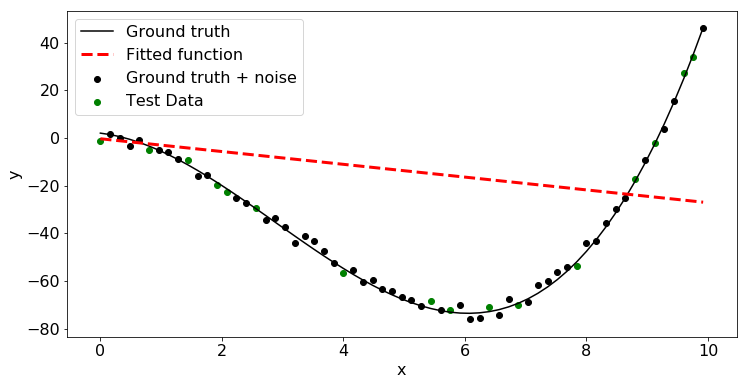

In [53]:
fig = plt.figure (figsize = (12,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x_train, y_train, label = "Ground truth + noise", color = 'black')
plt.scatter(x_val, y_val, label = "Test Data", color = 'green')
plt.plot(x, model.predict(x), color = 'red', ls = '--', lw = 3, 
         label = 'Fitted function')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

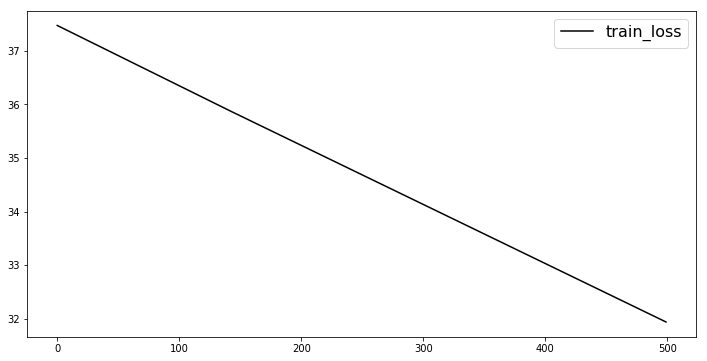

In [54]:
# The returned "history" object holds a record
# of the loss values and metric values during training
fig = plt.figure (figsize = (12,6))
plt.plot(history.history['loss'], label = "train_loss", color = 'black')
plt.legend(fontsize = 16, loc = 'upper right')
#print('\nhistory dict:', history.history)

**From the picture above, we can see that the train_loss is always decreace,so we can't find the "good enough epochs". So we need to increase the number of epochs. (Well, but here always overfitting)**

In [58]:
history = model.fit(x_train, y_train, epochs=2500, batch_size=47, validation_data=(x_val, y_val))

Train on 47 samples, validate on 16 samples
Epoch 1/2500
47/47 [==============================] - 0s 332us/sample - loss: 24.2321 - val_loss: 29.3345
Epoch 2/2500
47/47 [==============================] - 0s 332us/sample - loss: 24.2301 - val_loss: 29.3342
Epoch 3/2500
47/47 [==============================] - 0s 0s/sample - loss: 24.2281 - val_loss: 29.3339
Epoch 4/2500
47/47 [==============================] - 0s 333us/sample - loss: 24.2261 - val_loss: 29.3335
Epoch 5/2500
47/47 [==============================] - 0s 0s/sample - loss: 24.2241 - val_loss: 29.3332
Epoch 6/2500
47/47 [==============================] - 0s 332us/sample - loss: 24.2221 - val_loss: 29.3329
Epoch 7/2500
47/47 [==============================] - 0s 333us/sample - loss: 24.2201 - val_loss: 29.3325
Epoch 8/2500
47/47 [==============================] - 0s 332us/sample - loss: 24.2181 - val_loss: 29.3322
Epoch 9/2500
47/47 [==============================] - 0s 332us/sample - loss: 24.2161 - val_loss: 29.3319
Epoch 10

Epoch 79/2500
47/47 [==============================] - 0s 0s/sample - loss: 24.0758 - val_loss: 29.3086
Epoch 80/2500
47/47 [==============================] - 0s 332us/sample - loss: 24.0738 - val_loss: 29.3083
Epoch 81/2500
47/47 [==============================] - 0s 0s/sample - loss: 24.0718 - val_loss: 29.3079
Epoch 82/2500
47/47 [==============================] - 0s 0s/sample - loss: 24.0698 - val_loss: 29.3076
Epoch 83/2500
47/47 [==============================] - 0s 333us/sample - loss: 24.0678 - val_loss: 29.3073
Epoch 84/2500
47/47 [==============================] - 0s 0s/sample - loss: 24.0658 - val_loss: 29.3069
Epoch 85/2500
47/47 [==============================] - 0s 332us/sample - loss: 24.0638 - val_loss: 29.3066
Epoch 86/2500
47/47 [==============================] - 0s 0s/sample - loss: 24.0618 - val_loss: 29.3063
Epoch 87/2500
47/47 [==============================] - 0s 332us/sample - loss: 24.0598 - val_loss: 29.3059
Epoch 88/2500
47/47 [==============================]

47/47 [==============================] - 0s 332us/sample - loss: 23.9311 - val_loss: 29.2839
Epoch 157/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.9292 - val_loss: 29.2836
Epoch 158/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.9274 - val_loss: 29.2833
Epoch 159/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.9256 - val_loss: 29.2830
Epoch 160/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.9238 - val_loss: 29.2826
Epoch 161/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.9219 - val_loss: 29.2823
Epoch 162/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.9201 - val_loss: 29.2820
Epoch 163/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.9183 - val_loss: 29.2817
Epoch 164/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.9164 - val_loss: 29.2814
Epoch 165/2500
47/47 [==============================] -

47/47 [==============================] - 0s 332us/sample - loss: 23.7903 - val_loss: 29.2596
Epoch 234/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.7884 - val_loss: 29.2593
Epoch 235/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.7866 - val_loss: 29.2589
Epoch 236/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.7848 - val_loss: 29.2586
Epoch 237/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.7829 - val_loss: 29.2583
Epoch 238/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.7811 - val_loss: 29.2580
Epoch 239/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.7793 - val_loss: 29.2577
Epoch 240/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.7775 - val_loss: 29.2574
Epoch 241/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.7756 - val_loss: 29.2571
Epoch 242/2500
47/47 [==============================] -

47/47 [==============================] - 0s 332us/sample - loss: 23.6494 - val_loss: 29.2353
Epoch 311/2500
47/47 [==============================] - 0s 333us/sample - loss: 23.6476 - val_loss: 29.2349
Epoch 312/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.6458 - val_loss: 29.2346
Epoch 313/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.6440 - val_loss: 29.2343
Epoch 314/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.6421 - val_loss: 29.2340
Epoch 315/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.6403 - val_loss: 29.2337
Epoch 316/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.6385 - val_loss: 29.2334
Epoch 317/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.6366 - val_loss: 29.2330
Epoch 318/2500
47/47 [==============================] - 0s 333us/sample - loss: 23.6348 - val_loss: 29.2327
Epoch 319/2500
47/47 [==============================] -

Epoch 387/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.5086 - val_loss: 29.2109
Epoch 388/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.5068 - val_loss: 29.2106
Epoch 389/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.5050 - val_loss: 29.2103
Epoch 390/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.5032 - val_loss: 29.2100
Epoch 391/2500
47/47 [==============================] - 0s 333us/sample - loss: 23.5013 - val_loss: 29.2097
Epoch 392/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.4995 - val_loss: 29.2094
Epoch 393/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.4977 - val_loss: 29.2090
Epoch 394/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.4958 - val_loss: 29.2087
Epoch 395/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.4940 - val_loss: 29.2084
Epoch 396/2500
47/47 [==================

Epoch 464/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.3678 - val_loss: 29.1866
Epoch 465/2500
47/47 [==============================] - 0s 333us/sample - loss: 23.3660 - val_loss: 29.1863
Epoch 466/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.3642 - val_loss: 29.1860
Epoch 467/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.3623 - val_loss: 29.1857
Epoch 468/2500
47/47 [==============================] - 0s 333us/sample - loss: 23.3605 - val_loss: 29.1854
Epoch 469/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.3587 - val_loss: 29.1850
Epoch 470/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.3569 - val_loss: 29.1847
Epoch 471/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.3550 - val_loss: 29.1844
Epoch 472/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.3532 - val_loss: 29.1841
Epoch 473/2500
47/47 [=====================

Epoch 541/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.2270 - val_loss: 29.1623
Epoch 542/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.2252 - val_loss: 29.1620
Epoch 543/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.2234 - val_loss: 29.1617
Epoch 544/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.2215 - val_loss: 29.1613
Epoch 545/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.2197 - val_loss: 29.1610
Epoch 546/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.2179 - val_loss: 29.1607
Epoch 547/2500
47/47 [==============================] - 0s 333us/sample - loss: 23.2160 - val_loss: 29.1604
Epoch 548/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.2142 - val_loss: 29.1601
Epoch 549/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.2124 - val_loss: 29.1598
Epoch 550/2500
47/47 [===============

Epoch 618/2500
47/47 [==============================] - 0s 333us/sample - loss: 23.0862 - val_loss: 29.1733
Epoch 619/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.0844 - val_loss: 29.1743
Epoch 620/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.0825 - val_loss: 29.1753
Epoch 621/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.0807 - val_loss: 29.1763
Epoch 622/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.0789 - val_loss: 29.1773
Epoch 623/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.0771 - val_loss: 29.1783
Epoch 624/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.0752 - val_loss: 29.1794
Epoch 625/2500
47/47 [==============================] - 0s 0s/sample - loss: 23.0734 - val_loss: 29.1804
Epoch 626/2500
47/47 [==============================] - 0s 332us/sample - loss: 23.0716 - val_loss: 29.1814
Epoch 627/2500
47/47 [==================

Epoch 695/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.9454 - val_loss: 29.2512
Epoch 696/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.9436 - val_loss: 29.2522
Epoch 697/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.9417 - val_loss: 29.2532
Epoch 698/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.9399 - val_loss: 29.2542
Epoch 699/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.9381 - val_loss: 29.2552
Epoch 700/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.9362 - val_loss: 29.2563
Epoch 701/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.9344 - val_loss: 29.2573
Epoch 702/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.9326 - val_loss: 29.2583
Epoch 703/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.9308 - val_loss: 29.2593
Epoch 704/2500
47/47 [=====================

Epoch 772/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.8070 - val_loss: 29.3281
Epoch 773/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.8060 - val_loss: 29.3289
Epoch 774/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.8049 - val_loss: 29.3296
Epoch 775/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.8039 - val_loss: 29.3304
Epoch 776/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.8028 - val_loss: 29.3311
Epoch 777/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.8018 - val_loss: 29.3319
Epoch 778/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.8007 - val_loss: 29.3327
Epoch 779/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.7997 - val_loss: 29.3334
Epoch 780/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.7986 - val_loss: 29.3342
Epoch 781/2500
47/47 [==================

Epoch 849/2500
47/47 [==============================] - 0s 333us/sample - loss: 22.7261 - val_loss: 29.3866
Epoch 850/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.7251 - val_loss: 29.3874
Epoch 851/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.7240 - val_loss: 29.3881
Epoch 852/2500
47/47 [==============================] - 0s 333us/sample - loss: 22.7230 - val_loss: 29.3889
Epoch 853/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.7219 - val_loss: 29.3897
Epoch 854/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.7209 - val_loss: 29.3904
Epoch 855/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.7198 - val_loss: 29.3912
Epoch 856/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.7188 - val_loss: 29.3919
Epoch 857/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.7177 - val_loss: 29.3927
Epoch 858/2500
47/47 [===============

Epoch 926/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.6452 - val_loss: 29.4452
Epoch 927/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.6441 - val_loss: 29.4459
Epoch 928/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.6431 - val_loss: 29.4467
Epoch 929/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.6420 - val_loss: 29.4474
Epoch 930/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.6410 - val_loss: 29.4482
Epoch 931/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.6399 - val_loss: 29.4490
Epoch 932/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.6389 - val_loss: 29.4497
Epoch 933/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.6378 - val_loss: 29.4505
Epoch 934/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.6368 - val_loss: 29.4512
Epoch 935/2500
47/47 [==================

Epoch 1003/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.5643 - val_loss: 29.5037
Epoch 1004/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.5632 - val_loss: 29.5044
Epoch 1005/2500
47/47 [==============================] - 0s 333us/sample - loss: 22.5622 - val_loss: 29.5052
Epoch 1006/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.5611 - val_loss: 29.5060
Epoch 1007/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.5601 - val_loss: 29.5067
Epoch 1008/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.5590 - val_loss: 29.5075
Epoch 1009/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.5580 - val_loss: 29.5082
Epoch 1010/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.5569 - val_loss: 29.5090
Epoch 1011/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.5559 - val_loss: 29.5098
Epoch 1012/2500
47/47 [=====

47/47 [==============================] - 0s 333us/sample - loss: 22.4844 - val_loss: 29.5614
Epoch 1080/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.4834 - val_loss: 29.5622
Epoch 1081/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.4823 - val_loss: 29.5630
Epoch 1082/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.4813 - val_loss: 29.5637
Epoch 1083/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.4802 - val_loss: 29.5645
Epoch 1084/2500
47/47 [==============================] - 0s 333us/sample - loss: 22.4791 - val_loss: 29.5652
Epoch 1085/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.4781 - val_loss: 29.5660
Epoch 1086/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.4771 - val_loss: 29.5668
Epoch 1087/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.4760 - val_loss: 29.5675
Epoch 1088/2500
47/47 [========================

Epoch 1156/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.4107 - val_loss: 29.6165
Epoch 1157/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.4102 - val_loss: 29.6170
Epoch 1158/2500
47/47 [==============================] - 0s 333us/sample - loss: 22.4097 - val_loss: 29.6175
Epoch 1159/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.4092 - val_loss: 29.6180
Epoch 1160/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.4087 - val_loss: 29.6186
Epoch 1161/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.4082 - val_loss: 29.6191
Epoch 1162/2500
47/47 [==============================] - 0s 333us/sample - loss: 22.4077 - val_loss: 29.6196
Epoch 1163/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.4072 - val_loss: 29.6201
Epoch 1164/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.4067 - val_loss: 29.6206
Epoch 1165/2500
47/47 [========

Epoch 1233/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.3722 - val_loss: 29.6561
Epoch 1234/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.3717 - val_loss: 29.6566
Epoch 1235/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.3712 - val_loss: 29.6571
Epoch 1236/2500
47/47 [==============================] - 0s 333us/sample - loss: 22.3707 - val_loss: 29.6576
Epoch 1237/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.3702 - val_loss: 29.6581
Epoch 1238/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.3697 - val_loss: 29.6586
Epoch 1239/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.3692 - val_loss: 29.6591
Epoch 1240/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.3687 - val_loss: 29.6597
Epoch 1241/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.3682 - val_loss: 29.6602
Epoch 1242/2500
47/47 [========

Epoch 1309/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.3342 - val_loss: 29.6951
Epoch 1310/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.3337 - val_loss: 29.6956
Epoch 1311/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.3332 - val_loss: 29.6961
Epoch 1312/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.3327 - val_loss: 29.6966
Epoch 1313/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.3322 - val_loss: 29.6972
Epoch 1314/2500
47/47 [==============================] - 0s 333us/sample - loss: 22.3317 - val_loss: 29.6977
Epoch 1315/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.3312 - val_loss: 29.6982
Epoch 1316/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.3307 - val_loss: 29.6987
Epoch 1317/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.3302 - val_loss: 29.6992
Epoch 1318/2500
47/47 [=====

47/47 [==============================] - 0s 0s/sample - loss: 22.2962 - val_loss: 29.7341
Epoch 1386/2500
47/47 [==============================] - 0s 333us/sample - loss: 22.2957 - val_loss: 29.7346
Epoch 1387/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.2952 - val_loss: 29.7352
Epoch 1388/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.2947 - val_loss: 29.7357
Epoch 1389/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.2942 - val_loss: 29.7362
Epoch 1390/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.2937 - val_loss: 29.7367
Epoch 1391/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.2932 - val_loss: 29.7372
Epoch 1392/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.2927 - val_loss: 29.7377
Epoch 1393/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.2922 - val_loss: 29.7382
Epoch 1394/2500
47/47 [========================

Epoch 1462/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.2577 - val_loss: 29.7737
Epoch 1463/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.2572 - val_loss: 29.7742
Epoch 1464/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.2567 - val_loss: 29.7747
Epoch 1465/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.2562 - val_loss: 29.7752
Epoch 1466/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.2557 - val_loss: 29.7757
Epoch 1467/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.2552 - val_loss: 29.7763
Epoch 1468/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.2547 - val_loss: 29.7768
Epoch 1469/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.2542 - val_loss: 29.7773
Epoch 1470/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.2537 - val_loss: 29.7778
Epoch 1471/2500
47/47 [========

Epoch 1539/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.2192 - val_loss: 29.8132
Epoch 1540/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.2187 - val_loss: 29.8138
Epoch 1541/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.2182 - val_loss: 29.8143
Epoch 1542/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.2177 - val_loss: 29.8148
Epoch 1543/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.2172 - val_loss: 29.8153
Epoch 1544/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.2167 - val_loss: 29.8158
Epoch 1545/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.2162 - val_loss: 29.8163
Epoch 1546/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.2157 - val_loss: 29.8168
Epoch 1547/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.2152 - val_loss: 29.8174
Epoch 1548/2500
47/47 [========

Epoch 1616/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.1808 - val_loss: 29.8528
Epoch 1617/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.1803 - val_loss: 29.8533
Epoch 1618/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.1798 - val_loss: 29.8538
Epoch 1619/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.1793 - val_loss: 29.8543
Epoch 1620/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.1788 - val_loss: 29.8549
Epoch 1621/2500
47/47 [==============================] - 0s 333us/sample - loss: 22.1783 - val_loss: 29.8554
Epoch 1622/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.1778 - val_loss: 29.8559
Epoch 1623/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.1773 - val_loss: 29.8564
Epoch 1624/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.1768 - val_loss: 29.8569
Epoch 1625/2500
47/47 [========

47/47 [==============================] - 0s 332us/sample - loss: 22.1428 - val_loss: 29.8918
Epoch 1693/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.1423 - val_loss: 29.8923
Epoch 1694/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.1418 - val_loss: 29.8929
Epoch 1695/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.1413 - val_loss: 29.8934
Epoch 1696/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.1408 - val_loss: 29.8939
Epoch 1697/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.1403 - val_loss: 29.8944
Epoch 1698/2500
47/47 [==============================] - 0s 333us/sample - loss: 22.1398 - val_loss: 29.8949
Epoch 1699/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.1393 - val_loss: 29.8954
Epoch 1700/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.1388 - val_loss: 29.8959
Epoch 1701/2500
47/47 [=====================

Epoch 1769/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.1043 - val_loss: 29.9314
Epoch 1770/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.1038 - val_loss: 29.9319
Epoch 1771/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.1033 - val_loss: 29.9324
Epoch 1772/2500
47/47 [==============================] - 0s 333us/sample - loss: 22.1028 - val_loss: 29.9329
Epoch 1773/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.1023 - val_loss: 29.9334
Epoch 1774/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.1018 - val_loss: 29.9340
Epoch 1775/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.1013 - val_loss: 29.9345
Epoch 1776/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.1008 - val_loss: 29.9350
Epoch 1777/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.1003 - val_loss: 29.9355
Epoch 1778/2500
47/47 [========

Epoch 1846/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.0658 - val_loss: 29.9709
Epoch 1847/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.0653 - val_loss: 29.9714
Epoch 1848/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.0648 - val_loss: 29.9720
Epoch 1849/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.0643 - val_loss: 29.9725
Epoch 1850/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.0638 - val_loss: 29.9730
Epoch 1851/2500
47/47 [==============================] - 0s 333us/sample - loss: 22.0633 - val_loss: 29.9735
Epoch 1852/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.0628 - val_loss: 29.9740
Epoch 1853/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.0623 - val_loss: 29.9745
Epoch 1854/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.0618 - val_loss: 29.9750
Epoch 1855/2500
47/47 [========

Epoch 1923/2500
47/47 [==============================] - 0s 333us/sample - loss: 22.0273 - val_loss: 30.0105
Epoch 1924/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.0268 - val_loss: 30.0110
Epoch 1925/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.0263 - val_loss: 30.0115
Epoch 1926/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.0258 - val_loss: 30.0120
Epoch 1927/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.0253 - val_loss: 30.0125
Epoch 1928/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.0248 - val_loss: 30.0131
Epoch 1929/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.0243 - val_loss: 30.0136
Epoch 1930/2500
47/47 [==============================] - 0s 332us/sample - loss: 22.0238 - val_loss: 30.0141
Epoch 1931/2500
47/47 [==============================] - 0s 0s/sample - loss: 22.0233 - val_loss: 30.0146
Epoch 1932/2500
47/47 [========

Epoch 2000/2500
47/47 [==============================] - 0s 333us/sample - loss: 21.9954 - val_loss: 30.0466
Epoch 2001/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9950 - val_loss: 30.0471
Epoch 2002/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9946 - val_loss: 30.0476
Epoch 2003/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9942 - val_loss: 30.0480
Epoch 2004/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9938 - val_loss: 30.0485
Epoch 2005/2500
47/47 [==============================] - 0s 333us/sample - loss: 21.9934 - val_loss: 30.0489
Epoch 2006/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9930 - val_loss: 30.0494
Epoch 2007/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9927 - val_loss: 30.0498
Epoch 2008/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9923 - val_loss: 30.0503
Epoch 2009/2500
47/47 [===========

Epoch 2077/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9655 - val_loss: 30.0818
Epoch 2078/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9651 - val_loss: 30.0822
Epoch 2079/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9648 - val_loss: 30.0827
Epoch 2080/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9644 - val_loss: 30.0831
Epoch 2081/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9640 - val_loss: 30.0836
Epoch 2082/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9636 - val_loss: 30.0840
Epoch 2083/2500
47/47 [==============================] - 0s 333us/sample - loss: 21.9632 - val_loss: 30.0845
Epoch 2084/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9628 - val_loss: 30.0849
Epoch 2085/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9624 - val_loss: 30.0854
Epoch 2086/2500
47/47 [========

Epoch 2154/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9441 - val_loss: 30.1096
Epoch 2155/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9440 - val_loss: 30.1098
Epoch 2156/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9439 - val_loss: 30.1101
Epoch 2157/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9438 - val_loss: 30.1103
Epoch 2158/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9437 - val_loss: 30.1105
Epoch 2159/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9436 - val_loss: 30.1107
Epoch 2160/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9435 - val_loss: 30.1109
Epoch 2161/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9434 - val_loss: 30.1111
Epoch 2162/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9433 - val_loss: 30.1113
Epoch 2163/2500
47/47 [===========

47/47 [==============================] - 0s 333us/sample - loss: 21.9365 - val_loss: 30.1260
Epoch 2231/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9364 - val_loss: 30.1262
Epoch 2232/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9363 - val_loss: 30.1264
Epoch 2233/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9362 - val_loss: 30.1266
Epoch 2234/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9361 - val_loss: 30.1268
Epoch 2235/2500
47/47 [==============================] - 0s 333us/sample - loss: 21.9360 - val_loss: 30.1270
Epoch 2236/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9359 - val_loss: 30.1272
Epoch 2237/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9358 - val_loss: 30.1275
Epoch 2238/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9357 - val_loss: 30.1277
Epoch 2239/2500
47/47 [=====================

Epoch 2307/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9288 - val_loss: 30.1425
Epoch 2308/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9287 - val_loss: 30.1427
Epoch 2309/2500
47/47 [==============================] - 0s 333us/sample - loss: 21.9286 - val_loss: 30.1429
Epoch 2310/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9285 - val_loss: 30.1431
Epoch 2311/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9284 - val_loss: 30.1434
Epoch 2312/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9283 - val_loss: 30.1436
Epoch 2313/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9282 - val_loss: 30.1438
Epoch 2314/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9281 - val_loss: 30.1440
Epoch 2315/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9280 - val_loss: 30.1442
Epoch 2316/2500
47/47 [==============

Epoch 2384/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9211 - val_loss: 30.1590
Epoch 2385/2500
47/47 [==============================] - 0s 333us/sample - loss: 21.9210 - val_loss: 30.1592
Epoch 2386/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9209 - val_loss: 30.1595
Epoch 2387/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9208 - val_loss: 30.1597
Epoch 2388/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9207 - val_loss: 30.1599
Epoch 2389/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9206 - val_loss: 30.1601
Epoch 2390/2500
47/47 [==============================] - 0s 333us/sample - loss: 21.9205 - val_loss: 30.1603
Epoch 2391/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9204 - val_loss: 30.1605
Epoch 2392/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9203 - val_loss: 30.1608
Epoch 2393/2500
47/47 [=====

Epoch 2461/2500
47/47 [==============================] - 0s 333us/sample - loss: 21.9134 - val_loss: 30.1756
Epoch 2462/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9133 - val_loss: 30.1758
Epoch 2463/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9132 - val_loss: 30.1760
Epoch 2464/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9131 - val_loss: 30.1762
Epoch 2465/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9130 - val_loss: 30.1764
Epoch 2466/2500
47/47 [==============================] - 0s 333us/sample - loss: 21.9129 - val_loss: 30.1766
Epoch 2467/2500
47/47 [==============================] - 0s 0s/sample - loss: 21.9128 - val_loss: 30.1769
Epoch 2468/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9127 - val_loss: 30.1771
Epoch 2469/2500
47/47 [==============================] - 0s 332us/sample - loss: 21.9126 - val_loss: 30.1773
Epoch 2470/2500
47/47 [=====

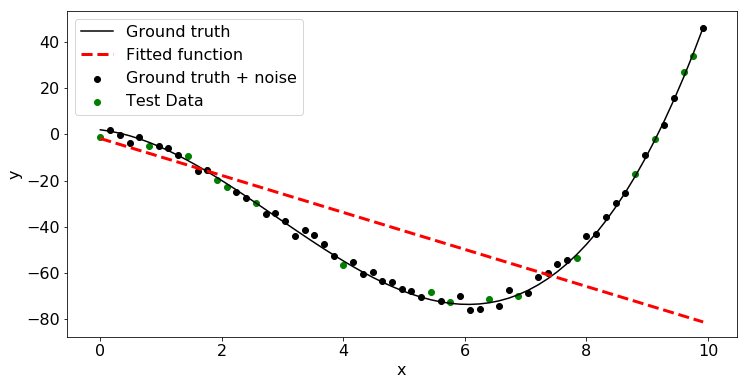

In [59]:
fig = plt.figure (figsize = (12,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x_train, y_train, label = "Ground truth + noise", color = 'black')
plt.scatter(x_val, y_val, label = "Test Data", color = 'green')
plt.plot(x, model.predict(x), color = 'red', ls = '--', lw = 3, 
         label = 'Fitted function')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

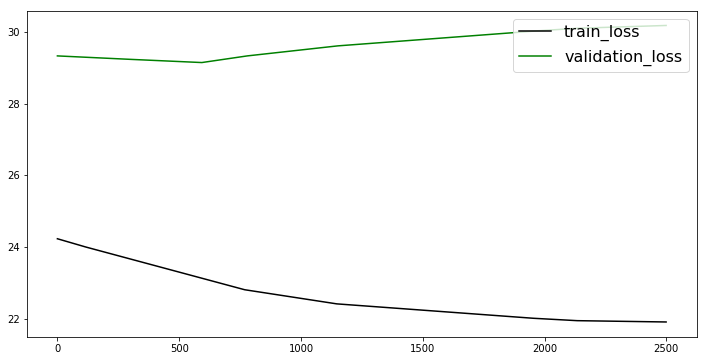

In [61]:
# The returned "history" object holds a record
# of the loss values and metric values during training
fig = plt.figure (figsize = (12,6))
plt.plot(history.history['loss'], label = "train_loss", color = 'black')
plt.plot(history.history['val_loss'], label="validation_loss", color="green")
plt.legend(fontsize = 16, loc = 'upper right')
#print('\nhistory dict:', history.history)

**Q: MAE or MSE?**
* Do you have outliers in the data?
    * Use MAE

* Are you sure they are outliers?
    * Use MAE

* or they are just unexpected values we should still care about?
    * Use MSE

### Usage of multi-layers network
Perhaps the use of multi-layers network can help us to fit the function better. The model that can be represented by this network is: 
$$y = w_3(w_2(w_1x + b_1)+ b_2)+ b_3 $$

In [62]:
Image(url= "https://i.imgur.com/q4ozgnk.jpg", width=800)

NameError: name 'Image' is not defined

In [63]:
model = keras.Sequential([layers.Dense(input_shape=[1],units= 1,use_bias=True),
                         layers.Dense(units= 1,use_bias=True),
                         layers.Dense(units= 1,use_bias=True)])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [64]:
loss = tf.keras.losses.MSE
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
metrics=[keras.metrics.MSE]
model.compile(loss=loss, # Loss function to minimize 
              optimizer=optimizer,# Optimizer
              merics = metrics) # List of metrics to monitor

In [65]:
history = model.fit(x_train, y_train, epochs=500, batch_size=47, validation_data=(x_val, y_val))

Train on 47 samples, validate on 16 samples
Epoch 1/500
47/47 [==============================] - 0s 5ms/sample - loss: 2034.1918 - val_loss: 1436.5704
Epoch 2/500
47/47 [==============================] - 0s 0s/sample - loss: 1449.6554 - val_loss: 1717.5894
Epoch 3/500
47/47 [==============================] - 0s 0s/sample - loss: 981.5910 - val_loss: 1649.2773
Epoch 4/500
47/47 [==============================] - 0s 332us/sample - loss: 979.0986 - val_loss: 1733.6996
Epoch 5/500
47/47 [==============================] - 0s 332us/sample - loss: 976.9278 - val_loss: 1614.0365
Epoch 6/500
47/47 [==============================] - 0s 0s/sample - loss: 975.7454 - val_loss: 1769.5558
Epoch 7/500
47/47 [==============================] - 0s 333us/sample - loss: 975.1394 - val_loss: 1560.4917
Epoch 8/500
47/47 [==============================] - 0s 332us/sample - loss: 978.2089 - val_loss: 1839.1866
Epoch 9/500
47/47 [==============================] - 0s 332us/sample - loss: 980.9290 - val_loss: 148

Epoch 77/500
47/47 [==============================] - 0s 333us/sample - loss: 901.7093 - val_loss: 1216.7113
Epoch 78/500
47/47 [==============================] - 0s 0s/sample - loss: 1004.0330 - val_loss: 1822.8206
Epoch 79/500
47/47 [==============================] - 0s 0s/sample - loss: 899.3948 - val_loss: 1213.8785
Epoch 80/500
47/47 [==============================] - 0s 332us/sample - loss: 1000.9697 - val_loss: 1817.1475
Epoch 81/500
47/47 [==============================] - 0s 333us/sample - loss: 897.1390 - val_loss: 1211.1741
Epoch 82/500
47/47 [==============================] - 0s 0s/sample - loss: 997.8719 - val_loss: 1811.5201
Epoch 83/500
47/47 [==============================] - 0s 332us/sample - loss: 894.9412 - val_loss: 1208.5930
Epoch 84/500
47/47 [==============================] - 0s 332us/sample - loss: 994.7493 - val_loss: 1805.9436
Epoch 85/500
47/47 [==============================] - 0s 0s/sample - loss: 892.8005 - val_loss: 1206.1306
Epoch 86/500
47/47 [=========

Epoch 153/500
47/47 [==============================] - 0s 333us/sample - loss: 844.6931 - val_loss: 1171.4169
Epoch 154/500
47/47 [==============================] - 0s 332us/sample - loss: 898.7464 - val_loss: 1651.1063
Epoch 155/500
47/47 [==============================] - 0s 0s/sample - loss: 843.7667 - val_loss: 1171.3749
Epoch 156/500
47/47 [==============================] - 0s 333us/sample - loss: 896.6501 - val_loss: 1647.7402
Epoch 157/500
47/47 [==============================] - 0s 0s/sample - loss: 842.8585 - val_loss: 1171.3689
Epoch 158/500
47/47 [==============================] - 0s 0s/sample - loss: 894.5909 - val_loss: 1644.4229
Epoch 159/500
47/47 [==============================] - 0s 332us/sample - loss: 841.9681 - val_loss: 1171.3973
Epoch 160/500
47/47 [==============================] - 0s 332us/sample - loss: 892.5687 - val_loss: 1641.1533
Epoch 161/500
47/47 [==============================] - 0s 0s/sample - loss: 841.0946 - val_loss: 1171.4587
Epoch 162/500
47/47 [=

Epoch 229/500
47/47 [==============================] - 0s 0s/sample - loss: 818.9887 - val_loss: 1186.2742
Epoch 230/500
47/47 [==============================] - 0s 0s/sample - loss: 841.4955 - val_loss: 1551.1195
Epoch 231/500
47/47 [==============================] - 0s 333us/sample - loss: 818.5078 - val_loss: 1186.9287
Epoch 232/500
47/47 [==============================] - 0s 0s/sample - loss: 840.4916 - val_loss: 1549.1082
Epoch 233/500
47/47 [==============================] - 0s 0s/sample - loss: 818.0342 - val_loss: 1187.5891
Epoch 234/500
47/47 [==============================] - 0s 332us/sample - loss: 839.5072 - val_loss: 1547.1215
Epoch 235/500
47/47 [==============================] - 0s 0s/sample - loss: 817.5680 - val_loss: 1188.2556
Epoch 236/500
47/47 [==============================] - 0s 332us/sample - loss: 838.5420 - val_loss: 1545.1593
Epoch 237/500
47/47 [==============================] - 0s 0s/sample - loss: 817.1089 - val_loss: 1188.9270
Epoch 238/500
47/47 [=======

Epoch 305/500
47/47 [==============================] - 0s 0s/sample - loss: 804.9972 - val_loss: 1212.9556
Epoch 306/500
47/47 [==============================] - 0s 332us/sample - loss: 814.2928 - val_loss: 1489.2205
Epoch 307/500
47/47 [==============================] - 0s 332us/sample - loss: 804.7250 - val_loss: 1213.6580
Epoch 308/500
47/47 [==============================] - 0s 0s/sample - loss: 813.8104 - val_loss: 1487.9221
Epoch 309/500
47/47 [==============================] - 0s 332us/sample - loss: 804.4570 - val_loss: 1214.3584
Epoch 310/500
47/47 [==============================] - 0s 332us/sample - loss: 813.3368 - val_loss: 1486.6377
Epoch 311/500
47/47 [==============================] - 0s 0s/sample - loss: 804.1926 - val_loss: 1215.0569
Epoch 312/500
47/47 [==============================] - 0s 332us/sample - loss: 812.8719 - val_loss: 1485.3665
Epoch 313/500
47/47 [==============================] - 0s 0s/sample - loss: 803.9322 - val_loss: 1215.7539
Epoch 314/500
47/47 [=

Epoch 381/500
47/47 [==============================] - 0s 332us/sample - loss: 796.9713 - val_loss: 1237.9193
Epoch 382/500
47/47 [==============================] - 0s 0s/sample - loss: 800.9254 - val_loss: 1448.0988
Epoch 383/500
47/47 [==============================] - 0s 0s/sample - loss: 796.8129 - val_loss: 1238.5200
Epoch 384/500
47/47 [==============================] - 0s 332us/sample - loss: 800.6807 - val_loss: 1447.2089
Epoch 385/500
47/47 [==============================] - 0s 0s/sample - loss: 796.6567 - val_loss: 1239.1176
Epoch 386/500
47/47 [==============================] - 0s 332us/sample - loss: 800.4401 - val_loss: 1446.3271
Epoch 387/500
47/47 [==============================] - 0s 332us/sample - loss: 796.5029 - val_loss: 1239.7119
Epoch 388/500
47/47 [==============================] - 0s 0s/sample - loss: 800.2036 - val_loss: 1445.4540
Epoch 389/500
47/47 [==============================] - 0s 332us/sample - loss: 796.3511 - val_loss: 1240.3032
Epoch 390/500
47/47 [=

Epoch 457/500
47/47 [==============================] - 0s 0s/sample - loss: 792.2638 - val_loss: 1258.5640
Epoch 458/500
47/47 [==============================] - 0s 332us/sample - loss: 793.9910 - val_loss: 1419.3413
Epoch 459/500
47/47 [==============================] - 0s 332us/sample - loss: 792.1702 - val_loss: 1259.0481
Epoch 460/500
47/47 [==============================] - 0s 0s/sample - loss: 793.8605 - val_loss: 1418.7061
Epoch 461/500
47/47 [==============================] - 0s 332us/sample - loss: 792.0779 - val_loss: 1259.5297
Epoch 462/500
47/47 [==============================] - 0s 332us/sample - loss: 793.7321 - val_loss: 1418.0759
Epoch 463/500
47/47 [==============================] - 0s 0s/sample - loss: 791.9866 - val_loss: 1260.0081
Epoch 464/500
47/47 [==============================] - 0s 332us/sample - loss: 793.6057 - val_loss: 1417.4509
Epoch 465/500
47/47 [==============================] - 0s 333us/sample - loss: 791.8968 - val_loss: 1260.4836
Epoch 466/500
47/47

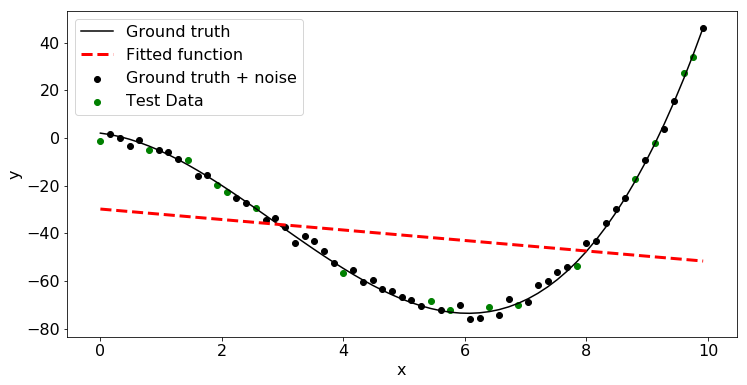

In [66]:
fig = plt.figure (figsize = (12,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x_train, y_train, label = "Ground truth + noise", color = 'black')
plt.scatter(x_val, y_val, label = "Test Data", color = 'green')
plt.plot(x, model.predict(x), color = 'red', ls = '--', lw = 3, 
         label = 'Fitted function')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

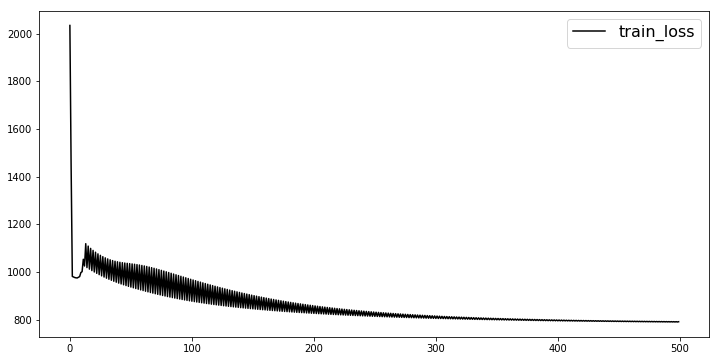

In [67]:
# The returned "history" object holds a record
# of the loss values and metric values during training
fig = plt.figure (figsize = (12,6))
plt.plot(history.history['loss'], label = "train_loss", color = 'black')
plt.legend(fontsize = 16, loc = 'upper right')
#print('\nhistory dict:', history.history)

### Usage of activation function:
However, simply outputting a weighted sum of the inputs limits the tasks that can be performed by the neural network. Therefore, a better processing of the data would be to map the weighted sum to a nonlinear space.

ReLU: An activation function that allows a model to solve nonlinear problems. The model that can be represented by this network is: 
$$y = \max(w_1x + b_1,0) $$

In [68]:
model = keras.Sequential([layers.Dense(input_shape=[1], units= 1,activation='relu',use_bias=True)])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [69]:
loss = tf.keras.losses.MSE
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
metrics=[keras.metrics.MSE]
model.compile(loss=loss, # Loss function to minimize 
              optimizer=optimizer,# Optimizer
              merics = metrics) # List of metrics to monitor

In [70]:
history = model.fit(x_train, y_train, epochs=500, batch_size=47, validation_data=(x_val, y_val))

Train on 47 samples, validate on 16 samples
Epoch 1/500
47/47 [==============================] - 0s 8ms/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 2/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 3/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 4/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 5/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 6/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 7/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9143 - val_loss: 1880.6067
Epoch 8/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9148 - val_loss: 1880.6067
Epoch 9/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 18

Epoch 76/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9143 - val_loss: 1880.6067
Epoch 77/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 78/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 79/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 80/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 81/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 82/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 83/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 84/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9148 - val_loss: 1880.6067
Epoch 85/500
47/47 [==

Epoch 151/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9148 - val_loss: 1880.6067
Epoch 152/500
47/47 [==============================] - 0s 333us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 153/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 154/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 155/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 156/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 157/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9143 - val_loss: 1880.6067
Epoch 158/500
47/47 [==============================] - 0s 333us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 159/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 160/

Epoch 226/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 227/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 228/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 229/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9148 - val_loss: 1880.6067
Epoch 230/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 231/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 232/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 233/500
47/47 [==============================] - 0s 333us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 234/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9148 - val_loss: 1880.6067
Epoch 235/500
47

Epoch 301/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 302/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 303/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 304/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 305/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 306/500
47/47 [==============================] - 0s 333us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 307/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 308/500
47/47 [==============================] - 0s 333us/sample - loss: 2293.9143 - val_loss: 1880.6067
Epoch 309/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 310/500

Epoch 376/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 377/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 378/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 379/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 380/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9143 - val_loss: 1880.6067
Epoch 381/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 382/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 383/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9143 - val_loss: 1880.6067
Epoch 384/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 385/

Epoch 451/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 452/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9143 - val_loss: 1880.6067
Epoch 453/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 454/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 455/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 456/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 457/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 458/500
47/47 [==============================] - 0s 332us/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 459/500
47/47 [==============================] - 0s 0s/sample - loss: 2293.9146 - val_loss: 1880.6067
Epoch 460/500

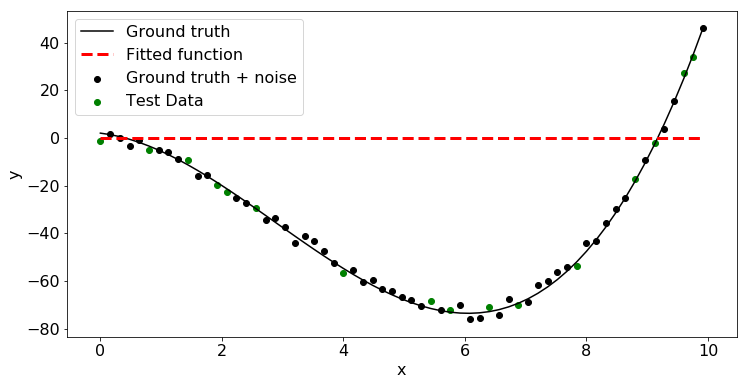

In [71]:
fig = plt.figure (figsize = (12,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x_train, y_train, label = "Ground truth + noise", color = 'black')
plt.scatter(x_val, y_val, label = "Test Data", color = 'green')
plt.plot(x, model.predict(x), color = 'red', ls = '--', lw = 3, 
         label = 'Fitted function')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

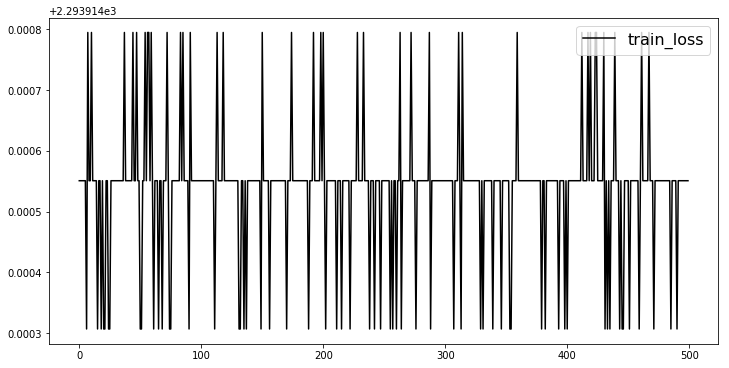

In [72]:
# The returned "history" object holds a record
# of the loss values and metric values during training
fig = plt.figure (figsize = (12,6))
plt.plot(history.history['loss'], label = "train_loss", color = 'black')
plt.legend(fontsize = 16, loc = 'upper right')
#print('\nhistory dict:', history.history)

In [73]:
model.weights

[<tf.Variable 'dense_9/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-1.5480698]], dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

**Q: Why is the result worse than the linear model?**  
**Answer by my self: Because ReLu is linear in the range of [0,finite]**

## Universal approximation theroy: 
The universal approximation theorem states that a feed-forward network with a single hidden layer containing a finite number of neurons (i.e., a multilayer perceptron), can approximate continuous functions on compact subsets of $R^n$, under mild assumptions on the activation function.

In [74]:
Image(url= "https://i.imgur.com/BLmMNo4.jpg", width=500)

NameError: name 'Image' is not defined

In [83]:
model = keras.Sequential([layers.Dense(input_shape=[1], units= 11,use_bias=True,activation='relu'),
                         layers.Dense(units= 1,use_bias=True)])

model.summary()

#Input Unit=2?????

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 11)                22        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 12        
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [84]:
loss = tf.keras.losses.MSE
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
metrics=[keras.metrics.MSE]
model.compile(loss=loss, # Loss function to minimize 
              optimizer=optimizer,# Optimizer
              merics = metrics) # List of metrics to monitor

In [85]:
history = model.fit(x_train, y_train, epochs=1500, batch_size=47, validation_data=(x_val, y_val))

Train on 47 samples, validate on 16 samples
Epoch 1/1500
47/47 [==============================] - 0s 8ms/sample - loss: 2220.5688 - val_loss: 1827.6904
Epoch 2/1500
47/47 [==============================] - 0s 0s/sample - loss: 2212.2202 - val_loss: 1822.2788
Epoch 3/1500
47/47 [==============================] - 0s 332us/sample - loss: 2203.8523 - val_loss: 1816.8682
Epoch 4/1500
47/47 [==============================] - 0s 332us/sample - loss: 2195.4644 - val_loss: 1811.4587
Epoch 5/1500
47/47 [==============================] - 0s 0s/sample - loss: 2187.0571 - val_loss: 1806.0500
Epoch 6/1500
47/47 [==============================] - 0s 332us/sample - loss: 2178.6292 - val_loss: 1800.6421
Epoch 7/1500
47/47 [==============================] - 0s 0s/sample - loss: 2170.1804 - val_loss: 1795.2347
Epoch 8/1500
47/47 [==============================] - 0s 0s/sample - loss: 2161.7102 - val_loss: 1789.8279
Epoch 9/1500
47/47 [==============================] - 0s 332us/sample - loss: 2153.2158 - 

Epoch 76/1500
47/47 [==============================] - 0s 332us/sample - loss: 1446.4636 - val_loss: 1411.0393
Epoch 77/1500
47/47 [==============================] - 0s 333us/sample - loss: 1434.2008 - val_loss: 1406.7268
Epoch 78/1500
47/47 [==============================] - 0s 0s/sample - loss: 1421.9829 - val_loss: 1402.5505
Epoch 79/1500
47/47 [==============================] - 0s 332us/sample - loss: 1409.8165 - val_loss: 1398.5149
Epoch 80/1500
47/47 [==============================] - 0s 332us/sample - loss: 1397.7079 - val_loss: 1394.6252
Epoch 81/1500
47/47 [==============================] - 0s 0s/sample - loss: 1385.6635 - val_loss: 1390.8859
Epoch 82/1500
47/47 [==============================] - 0s 332us/sample - loss: 1373.6891 - val_loss: 1387.3020
Epoch 83/1500
47/47 [==============================] - 0s 333us/sample - loss: 1361.7916 - val_loss: 1383.8779
Epoch 84/1500
47/47 [==============================] - 0s 0s/sample - loss: 1349.9772 - val_loss: 1380.6177
Epoch 85/1

Epoch 151/1500
47/47 [==============================] - 0s 0s/sample - loss: 930.9940 - val_loss: 1527.9412
Epoch 152/1500
47/47 [==============================] - 0s 332us/sample - loss: 929.9623 - val_loss: 1531.9736
Epoch 153/1500
47/47 [==============================] - 0s 0s/sample - loss: 929.0014 - val_loss: 1535.9131
Epoch 154/1500
47/47 [==============================] - 0s 333us/sample - loss: 928.1071 - val_loss: 1539.7559
Epoch 155/1500
47/47 [==============================] - 0s 0s/sample - loss: 927.2746 - val_loss: 1543.4983
Epoch 156/1500
47/47 [==============================] - 0s 0s/sample - loss: 926.5007 - val_loss: 1547.1382
Epoch 157/1500
47/47 [==============================] - 0s 332us/sample - loss: 925.7812 - val_loss: 1550.6721
Epoch 158/1500
47/47 [==============================] - 0s 0s/sample - loss: 925.1121 - val_loss: 1554.0980
Epoch 159/1500
47/47 [==============================] - 0s 332us/sample - loss: 924.4902 - val_loss: 1557.4142
Epoch 160/1500
4

Epoch 226/1500
47/47 [==============================] - 0s 0s/sample - loss: 909.7728 - val_loss: 1602.9680
Epoch 227/1500
47/47 [==============================] - 0s 332us/sample - loss: 909.6006 - val_loss: 1602.6240
Epoch 228/1500
47/47 [==============================] - 0s 332us/sample - loss: 909.4281 - val_loss: 1602.2803
Epoch 229/1500
47/47 [==============================] - 0s 0s/sample - loss: 909.2557 - val_loss: 1601.9370
Epoch 230/1500
47/47 [==============================] - 0s 332us/sample - loss: 909.0830 - val_loss: 1601.5948
Epoch 231/1500
47/47 [==============================] - 0s 0s/sample - loss: 908.9102 - val_loss: 1601.2537
Epoch 232/1500
47/47 [==============================] - 0s 332us/sample - loss: 908.7374 - val_loss: 1600.9138
Epoch 233/1500
47/47 [==============================] - 0s 333us/sample - loss: 908.5643 - val_loss: 1600.5757
Epoch 234/1500
47/47 [==============================] - 0s 0s/sample - loss: 908.3911 - val_loss: 1600.2394
Epoch 235/150

Epoch 301/1500
47/47 [==============================] - 0s 332us/sample - loss: 896.4972 - val_loss: 1581.0532
Epoch 302/1500
47/47 [==============================] - 0s 0s/sample - loss: 896.3157 - val_loss: 1580.7771
Epoch 303/1500
47/47 [==============================] - 0s 333us/sample - loss: 896.1343 - val_loss: 1580.5005
Epoch 304/1500
47/47 [==============================] - 0s 0s/sample - loss: 895.9526 - val_loss: 1580.2236
Epoch 305/1500
47/47 [==============================] - 0s 0s/sample - loss: 895.7711 - val_loss: 1579.9464
Epoch 306/1500
47/47 [==============================] - 0s 333us/sample - loss: 895.5892 - val_loss: 1579.6687
Epoch 307/1500
47/47 [==============================] - 0s 0s/sample - loss: 895.4074 - val_loss: 1579.3906
Epoch 308/1500
47/47 [==============================] - 0s 332us/sample - loss: 895.2254 - val_loss: 1579.1122
Epoch 309/1500
47/47 [==============================] - 0s 0s/sample - loss: 895.0433 - val_loss: 1578.8335
Epoch 310/1500
4

Epoch 376/1500
47/47 [==============================] - 0s 332us/sample - loss: 882.6463 - val_loss: 1559.3427
Epoch 377/1500
47/47 [==============================] - 0s 0s/sample - loss: 882.4586 - val_loss: 1559.0408
Epoch 378/1500
47/47 [==============================] - 0s 332us/sample - loss: 882.2709 - val_loss: 1558.7386
Epoch 379/1500
47/47 [==============================] - 0s 332us/sample - loss: 882.0829 - val_loss: 1558.4363
Epoch 380/1500
47/47 [==============================] - 0s 0s/sample - loss: 881.8951 - val_loss: 1558.1335
Epoch 381/1500
47/47 [==============================] - 0s 333us/sample - loss: 881.7071 - val_loss: 1557.8303
Epoch 382/1500
47/47 [==============================] - 0s 332us/sample - loss: 881.5189 - val_loss: 1557.5271
Epoch 383/1500
47/47 [==============================] - 0s 0s/sample - loss: 881.3309 - val_loss: 1557.2234
Epoch 384/1500
47/47 [==============================] - 0s 332us/sample - loss: 881.1427 - val_loss: 1556.9196
Epoch 385/

Epoch 451/1500
47/47 [==============================] - 0s 333us/sample - loss: 868.3925 - val_loss: 1535.7942
Epoch 452/1500
47/47 [==============================] - 0s 332us/sample - loss: 868.2004 - val_loss: 1535.4673
Epoch 453/1500
47/47 [==============================] - 0s 0s/sample - loss: 868.0082 - val_loss: 1535.1399
Epoch 454/1500
47/47 [==============================] - 0s 332us/sample - loss: 867.8160 - val_loss: 1534.8124
Epoch 455/1500
47/47 [==============================] - 0s 0s/sample - loss: 867.6237 - val_loss: 1534.4844
Epoch 456/1500
47/47 [==============================] - 0s 0s/sample - loss: 867.4313 - val_loss: 1534.1561
Epoch 457/1500
47/47 [==============================] - 0s 332us/sample - loss: 867.2390 - val_loss: 1533.8276
Epoch 458/1500
47/47 [==============================] - 0s 0s/sample - loss: 867.0464 - val_loss: 1533.4988
Epoch 459/1500
47/47 [==============================] - 0s 332us/sample - loss: 866.8541 - val_loss: 1533.1694
Epoch 460/150

Epoch 526/1500
47/47 [==============================] - 0s 332us/sample - loss: 853.8876 - val_loss: 1510.3130
Epoch 527/1500
47/47 [==============================] - 0s 0s/sample - loss: 853.6935 - val_loss: 1509.9602
Epoch 528/1500
47/47 [==============================] - 0s 332us/sample - loss: 853.4993 - val_loss: 1509.6069
Epoch 529/1500
47/47 [==============================] - 0s 332us/sample - loss: 853.3053 - val_loss: 1509.2537
Epoch 530/1500
47/47 [==============================] - 0s 0s/sample - loss: 853.1111 - val_loss: 1508.8999
Epoch 531/1500
47/47 [==============================] - 0s 333us/sample - loss: 852.9171 - val_loss: 1508.5459
Epoch 532/1500
47/47 [==============================] - 0s 0s/sample - loss: 852.7229 - val_loss: 1508.1914
Epoch 533/1500
47/47 [==============================] - 0s 332us/sample - loss: 852.5289 - val_loss: 1507.8367
Epoch 534/1500
47/47 [==============================] - 0s 333us/sample - loss: 852.3348 - val_loss: 1507.4814
Epoch 535/

Epoch 601/1500
47/47 [==============================] - 0s 332us/sample - loss: 839.3969 - val_loss: 1483.0087
Epoch 602/1500
47/47 [==============================] - 0s 0s/sample - loss: 839.2058 - val_loss: 1482.6344
Epoch 603/1500
47/47 [==============================] - 0s 332us/sample - loss: 839.0147 - val_loss: 1482.2600
Epoch 604/1500
47/47 [==============================] - 0s 332us/sample - loss: 838.8238 - val_loss: 1481.8855
Epoch 605/1500
47/47 [==============================] - 0s 332us/sample - loss: 838.6330 - val_loss: 1481.5107
Epoch 606/1500
47/47 [==============================] - 0s 0s/sample - loss: 838.4421 - val_loss: 1481.1355
Epoch 607/1500
47/47 [==============================] - 0s 333us/sample - loss: 838.2515 - val_loss: 1480.7605
Epoch 608/1500
47/47 [==============================] - 0s 0s/sample - loss: 838.0609 - val_loss: 1480.3849
Epoch 609/1500
47/47 [==============================] - 0s 332us/sample - loss: 837.8704 - val_loss: 1480.0093
Epoch 610/

Epoch 676/1500
47/47 [==============================] - 0s 332us/sample - loss: 825.4263 - val_loss: 1454.5520
Epoch 677/1500
47/47 [==============================] - 0s 0s/sample - loss: 825.2468 - val_loss: 1454.1707
Epoch 678/1500
47/47 [==============================] - 0s 333us/sample - loss: 825.0675 - val_loss: 1453.7893
Epoch 679/1500
47/47 [==============================] - 0s 0s/sample - loss: 824.8885 - val_loss: 1453.4080
Epoch 680/1500
47/47 [==============================] - 0s 333us/sample - loss: 824.7098 - val_loss: 1453.0266
Epoch 681/1500
47/47 [==============================] - 0s 332us/sample - loss: 824.5312 - val_loss: 1452.6455
Epoch 682/1500
47/47 [==============================] - 0s 0s/sample - loss: 824.3530 - val_loss: 1452.2644
Epoch 683/1500
47/47 [==============================] - 0s 332us/sample - loss: 824.1749 - val_loss: 1451.8833
Epoch 684/1500
47/47 [==============================] - 0s 0s/sample - loss: 823.9973 - val_loss: 1451.5022
Epoch 685/150

Epoch 751/1500
47/47 [==============================] - 0s 332us/sample - loss: 812.7625 - val_loss: 1426.4062
Epoch 752/1500
47/47 [==============================] - 0s 332us/sample - loss: 812.6066 - val_loss: 1426.0422
Epoch 753/1500
47/47 [==============================] - 0s 0s/sample - loss: 812.4512 - val_loss: 1425.6785
Epoch 754/1500
47/47 [==============================] - 0s 333us/sample - loss: 812.2962 - val_loss: 1425.3151
Epoch 755/1500
47/47 [==============================] - 0s 0s/sample - loss: 812.1415 - val_loss: 1424.9524
Epoch 756/1500
47/47 [==============================] - 0s 332us/sample - loss: 811.9873 - val_loss: 1424.5898
Epoch 757/1500
47/47 [==============================] - 0s 333us/sample - loss: 811.8336 - val_loss: 1424.2280
Epoch 758/1500
47/47 [==============================] - 0s 0s/sample - loss: 811.6800 - val_loss: 1423.8665
Epoch 759/1500
47/47 [==============================] - 0s 332us/sample - loss: 811.5271 - val_loss: 1423.5054
Epoch 760/

Epoch 826/1500
47/47 [==============================] - 0s 0s/sample - loss: 802.3038 - val_loss: 1400.6221
Epoch 827/1500
47/47 [==============================] - 0s 0s/sample - loss: 802.1827 - val_loss: 1400.3037
Epoch 828/1500
47/47 [==============================] - 0s 333us/sample - loss: 802.0620 - val_loss: 1399.9860
Epoch 829/1500
47/47 [==============================] - 0s 0s/sample - loss: 801.9419 - val_loss: 1399.6693
Epoch 830/1500
47/47 [==============================] - 0s 332us/sample - loss: 801.8224 - val_loss: 1399.3530
Epoch 831/1500
47/47 [==============================] - 0s 332us/sample - loss: 801.7032 - val_loss: 1399.0378
Epoch 832/1500
47/47 [==============================] - 0s 0s/sample - loss: 801.5847 - val_loss: 1398.7231
Epoch 833/1500
47/47 [==============================] - 0s 333us/sample - loss: 801.4665 - val_loss: 1398.4094
Epoch 834/1500
47/47 [==============================] - 0s 332us/sample - loss: 801.3491 - val_loss: 1398.0964
Epoch 835/150

Epoch 901/1500
47/47 [==============================] - 0s 0s/sample - loss: 794.6649 - val_loss: 1379.0977
Epoch 902/1500
47/47 [==============================] - 0s 332us/sample - loss: 794.5828 - val_loss: 1378.8452
Epoch 903/1500
47/47 [==============================] - 0s 0s/sample - loss: 794.5012 - val_loss: 1378.5935
Epoch 904/1500
47/47 [==============================] - 0s 332us/sample - loss: 794.4200 - val_loss: 1378.3430
Epoch 905/1500
47/47 [==============================] - 0s 332us/sample - loss: 794.3395 - val_loss: 1378.0933
Epoch 906/1500
47/47 [==============================] - 0s 0s/sample - loss: 794.2595 - val_loss: 1377.8445
Epoch 907/1500
47/47 [==============================] - 0s 332us/sample - loss: 794.1800 - val_loss: 1377.5968
Epoch 908/1500
47/47 [==============================] - 0s 0s/sample - loss: 794.1009 - val_loss: 1377.3499
Epoch 909/1500
47/47 [==============================] - 0s 333us/sample - loss: 794.0223 - val_loss: 1377.1040
Epoch 910/150

Epoch 976/1500
47/47 [==============================] - 0s 333us/sample - loss: 789.8341 - val_loss: 1362.7799
Epoch 977/1500
47/47 [==============================] - 0s 0s/sample - loss: 789.7864 - val_loss: 1362.5975
Epoch 978/1500
47/47 [==============================] - 0s 332us/sample - loss: 789.7391 - val_loss: 1362.4161
Epoch 979/1500
47/47 [==============================] - 0s 0s/sample - loss: 789.6921 - val_loss: 1362.2356
Epoch 980/1500
47/47 [==============================] - 0s 332us/sample - loss: 789.6456 - val_loss: 1362.0560
Epoch 981/1500
47/47 [==============================] - 0s 332us/sample - loss: 789.5994 - val_loss: 1361.8774
Epoch 982/1500
47/47 [==============================] - 0s 0s/sample - loss: 789.5537 - val_loss: 1361.6995
Epoch 983/1500
47/47 [==============================] - 0s 332us/sample - loss: 789.5083 - val_loss: 1361.5225
Epoch 984/1500
47/47 [==============================] - 0s 0s/sample - loss: 789.4633 - val_loss: 1361.3464
Epoch 985/150

Epoch 1051/1500
47/47 [==============================] - 0s 332us/sample - loss: 787.2131 - val_loss: 1351.4459
Epoch 1052/1500
47/47 [==============================] - 0s 332us/sample - loss: 787.1893 - val_loss: 1351.3245
Epoch 1053/1500
47/47 [==============================] - 0s 0s/sample - loss: 787.1658 - val_loss: 1351.2037
Epoch 1054/1500
47/47 [==============================] - 0s 332us/sample - loss: 787.1425 - val_loss: 1351.0837
Epoch 1055/1500
47/47 [==============================] - 0s 0s/sample - loss: 787.1195 - val_loss: 1350.9644
Epoch 1056/1500
47/47 [==============================] - 0s 332us/sample - loss: 787.0967 - val_loss: 1350.8457
Epoch 1057/1500
47/47 [==============================] - 0s 332us/sample - loss: 787.0742 - val_loss: 1350.7278
Epoch 1058/1500
47/47 [==============================] - 0s 0s/sample - loss: 787.0519 - val_loss: 1350.6106
Epoch 1059/1500
47/47 [==============================] - 0s 332us/sample - loss: 787.0298 - val_loss: 1350.4941
E

Epoch 1126/1500
47/47 [==============================] - 0s 0s/sample - loss: 786.0115 - val_loss: 1344.4948
Epoch 1127/1500
47/47 [==============================] - 0s 333us/sample - loss: 786.0011 - val_loss: 1344.2080
Epoch 1128/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.9910 - val_loss: 1343.9429
Epoch 1129/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.9810 - val_loss: 1343.7009
Epoch 1130/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.9711 - val_loss: 1343.4834
Epoch 1131/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.9615 - val_loss: 1343.2904
Epoch 1132/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.9520 - val_loss: 1343.1219
Epoch 1133/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.9425 - val_loss: 1342.9775
Epoch 1134/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.9332 - val_loss: 1342.8561
Epoch 1

Epoch 1201/1500
47/47 [==============================] - 0s 333us/sample - loss: 785.5363 - val_loss: 1343.4155
Epoch 1202/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.5322 - val_loss: 1343.2423
Epoch 1203/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.5278 - val_loss: 1343.0149
Epoch 1204/1500
47/47 [==============================] - 0s 333us/sample - loss: 785.5228 - val_loss: 1342.7429
Epoch 1205/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.5177 - val_loss: 1342.4351
Epoch 1206/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.5126 - val_loss: 1342.1007
Epoch 1207/1500
47/47 [==============================] - 0s 333us/sample - loss: 785.5076 - val_loss: 1341.7488
Epoch 1208/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.5025 - val_loss: 1341.3868
Epoch 1209/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.4977 - val_loss: 1341.0231
E

Epoch 1275/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.3469 - val_loss: 1340.7288
Epoch 1276/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.3453 - val_loss: 1340.5823
Epoch 1277/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.3433 - val_loss: 1340.3787
Epoch 1278/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.3408 - val_loss: 1340.1277
Epoch 1279/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.3382 - val_loss: 1339.8389
Epoch 1280/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.3355 - val_loss: 1339.5219
Epoch 1281/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.3328 - val_loss: 1339.1858
Epoch 1282/1500
47/47 [==============================] - 0s 333us/sample - loss: 785.3300 - val_loss: 1338.8398
Epoch 1283/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.3277 - val_loss: 1338.4917
Epoch 1

47/47 [==============================] - 0s 0s/sample - loss: 785.2652 - val_loss: 1335.8066
Epoch 1350/1500
47/47 [==============================] - 0s 333us/sample - loss: 785.2647 - val_loss: 1335.8003
Epoch 1351/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.2641 - val_loss: 1335.7935
Epoch 1352/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.2637 - val_loss: 1335.7859
Epoch 1353/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.2632 - val_loss: 1335.7778
Epoch 1354/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.2626 - val_loss: 1335.7687
Epoch 1355/1500
47/47 [==============================] - 0s 333us/sample - loss: 785.2621 - val_loss: 1335.7587
Epoch 1356/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.2617 - val_loss: 1335.7478
Epoch 1357/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.2612 - val_loss: 1335.7358
Epoch 1358/1500
47/47 [

Epoch 1424/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.2425 - val_loss: 1334.8931
Epoch 1425/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.2424 - val_loss: 1334.8840
Epoch 1426/1500
47/47 [==============================] - 0s 333us/sample - loss: 785.2422 - val_loss: 1334.8752
Epoch 1427/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.2420 - val_loss: 1334.8665
Epoch 1428/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.2419 - val_loss: 1334.8579
Epoch 1429/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.2418 - val_loss: 1334.8492
Epoch 1430/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.2416 - val_loss: 1334.8408
Epoch 1431/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.2415 - val_loss: 1334.8325
Epoch 1432/1500
47/47 [==============================] - 0s 0s/sample - loss: 785.2413 - val_loss: 1334.8240
Epoc

Epoch 1499/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.2379 - val_loss: 1334.9766
Epoch 1500/1500
47/47 [==============================] - 0s 332us/sample - loss: 785.2378 - val_loss: 1334.9537


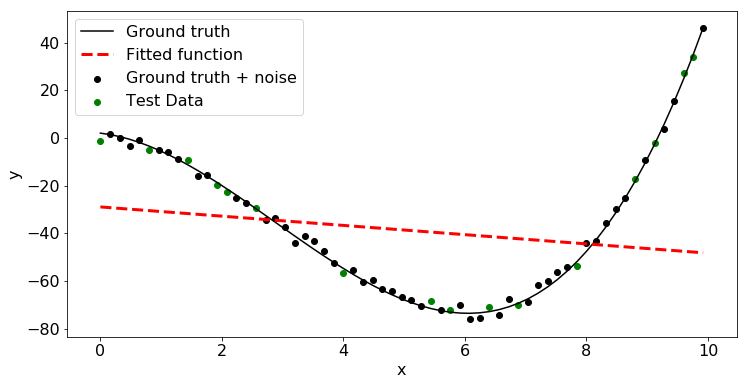

In [86]:
fig = plt.figure (figsize = (12,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x_train, y_train, label = "Ground truth + noise", color = 'black')
plt.scatter(x_val, y_val, label = "Test Data", color = 'green')
plt.plot(x, model.predict(x), color = 'red', ls = '--', lw = 3, 
         label = 'Fitted function')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

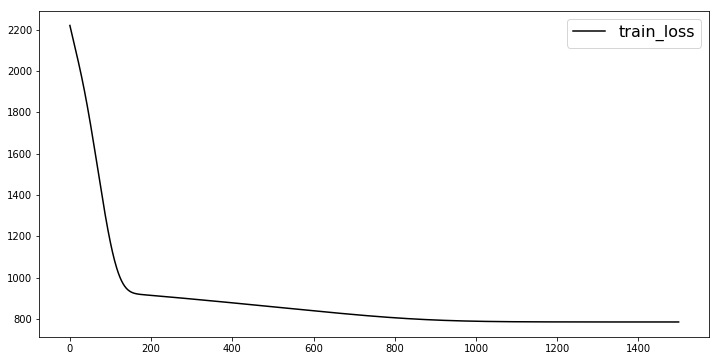

In [87]:
# The returned "history" object holds a record
# of the loss values and metric values during training
fig = plt.figure (figsize = (12,6))
plt.plot(history.history['loss'], label = "train_loss", color = 'black')
plt.legend(fontsize = 16, loc = 'upper right')
#print('\nhistory dict:', history.history)

## Let's go deeper

In [89]:
model = keras.Sequential([layers.Dense(input_shape=[1], units= 20,use_bias=True,activation='relu'),
                         layers.Dense(units= 10,use_bias=True,activation='relu'),
                         layers.Dense(units= 10,use_bias=True,activation='relu'),
                         layers.Dense(units= 1,use_bias=True)])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_25 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [90]:
loss = tf.keras.losses.MAE
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)
metrics=[keras.metrics.MAE]
model.compile(loss=loss, # Loss function to minimize 
              optimizer=optimizer,# Optimizer
              merics = metrics) # List of metrics to monitor

In [91]:
history = model.fit(x_train, y_train, epochs=2200, batch_size=47, validation_data=(x_val, y_val))

Train on 47 samples, validate on 16 samples
Epoch 1/2200
47/47 [==============================] - 1s 11ms/sample - loss: 42.5939 - val_loss: 35.9106
Epoch 2/2200
47/47 [==============================] - 0s 0s/sample - loss: 42.5104 - val_loss: 35.8486
Epoch 3/2200
47/47 [==============================] - 0s 332us/sample - loss: 42.4285 - val_loss: 35.7891
Epoch 4/2200
47/47 [==============================] - 0s 333us/sample - loss: 42.3497 - val_loss: 35.7385
Epoch 5/2200
47/47 [==============================] - 0s 0s/sample - loss: 42.2830 - val_loss: 35.6891
Epoch 6/2200
47/47 [==============================] - 0s 332us/sample - loss: 42.2177 - val_loss: 35.6407
Epoch 7/2200
47/47 [==============================] - 0s 332us/sample - loss: 42.1535 - val_loss: 35.5933
Epoch 8/2200
47/47 [==============================] - 0s 0s/sample - loss: 42.0906 - val_loss: 35.5467
Epoch 9/2200
47/47 [==============================] - 0s 0s/sample - loss: 42.0288 - val_loss: 35.5003
Epoch 10/2200
4

47/47 [==============================] - 0s 332us/sample - loss: 37.1200 - val_loss: 32.6388
Epoch 79/2200
47/47 [==============================] - 0s 0s/sample - loss: 36.9954 - val_loss: 32.5688
Epoch 80/2200
47/47 [==============================] - 0s 0s/sample - loss: 36.8677 - val_loss: 32.4969
Epoch 81/2200
47/47 [==============================] - 0s 332us/sample - loss: 36.7367 - val_loss: 32.4232
Epoch 82/2200
47/47 [==============================] - 0s 332us/sample - loss: 36.6023 - val_loss: 32.3469
Epoch 83/2200
47/47 [==============================] - 0s 0s/sample - loss: 36.4640 - val_loss: 32.2684
Epoch 84/2200
47/47 [==============================] - 0s 332us/sample - loss: 36.3220 - val_loss: 32.1882
Epoch 85/2200
47/47 [==============================] - 0s 333us/sample - loss: 36.1765 - val_loss: 32.1059
Epoch 86/2200
47/47 [==============================] - 0s 0s/sample - loss: 36.0271 - val_loss: 32.0215
Epoch 87/2200
47/47 [==============================] - 0s 332us

Epoch 155/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.6095 - val_loss: 29.6283
Epoch 156/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.5479 - val_loss: 29.7278
Epoch 157/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.5112 - val_loss: 29.8216
Epoch 158/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.4839 - val_loss: 29.9102
Epoch 159/2200
47/47 [==============================] - 0s 333us/sample - loss: 21.4580 - val_loss: 29.9941
Epoch 160/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.4334 - val_loss: 30.0737
Epoch 161/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.4111 - val_loss: 30.1453
Epoch 162/2200
47/47 [==============================] - 0s 333us/sample - loss: 21.4120 - val_loss: 30.2096
Epoch 163/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.4126 - val_loss: 30.2671
Epoch 164/2200
47/47 [===============

Epoch 232/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.2823 - val_loss: 30.1109
Epoch 233/2200
47/47 [==============================] - 0s 333us/sample - loss: 21.2797 - val_loss: 30.1019
Epoch 234/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.2771 - val_loss: 30.0929
Epoch 235/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.2744 - val_loss: 30.0840
Epoch 236/2200
47/47 [==============================] - 0s 333us/sample - loss: 21.2718 - val_loss: 30.0750
Epoch 237/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.2691 - val_loss: 30.0662
Epoch 238/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.2665 - val_loss: 30.0571
Epoch 239/2200
47/47 [==============================] - 0s 333us/sample - loss: 21.2638 - val_loss: 30.0481
Epoch 240/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.2633 - val_loss: 30.0466
Epoch 241/2200
47/47 [========================

Epoch 309/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.0689 - val_loss: 30.0537
Epoch 310/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.0655 - val_loss: 30.0600
Epoch 311/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.0616 - val_loss: 30.0705
Epoch 312/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.0598 - val_loss: 30.0750
Epoch 313/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.0573 - val_loss: 30.0742
Epoch 314/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.0542 - val_loss: 30.0681
Epoch 315/2200
47/47 [==============================] - 0s 333us/sample - loss: 21.0503 - val_loss: 30.0577
Epoch 316/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.0459 - val_loss: 30.0433
Epoch 317/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.0438 - val_loss: 30.0351
Epoch 318/2200
47/47 [=====================

Epoch 386/2200
47/47 [==============================] - 0s 0s/sample - loss: 20.7379 - val_loss: 29.9072
Epoch 387/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.7325 - val_loss: 29.9013
Epoch 388/2200
47/47 [==============================] - 0s 0s/sample - loss: 20.7270 - val_loss: 29.8966
Epoch 389/2200
47/47 [==============================] - 0s 0s/sample - loss: 20.7214 - val_loss: 29.8929
Epoch 390/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.7157 - val_loss: 29.8899
Epoch 391/2200
47/47 [==============================] - 0s 0s/sample - loss: 20.7100 - val_loss: 29.8887
Epoch 392/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.7041 - val_loss: 29.8889
Epoch 393/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.6981 - val_loss: 29.8896
Epoch 394/2200
47/47 [==============================] - 0s 0s/sample - loss: 20.6921 - val_loss: 29.8907
Epoch 395/2200
47/47 [=====================

Epoch 463/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.0590 - val_loss: 29.6713
Epoch 464/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.0455 - val_loss: 29.6655
Epoch 465/2200
47/47 [==============================] - 0s 0s/sample - loss: 20.0318 - val_loss: 29.6612
Epoch 466/2200
47/47 [==============================] - 0s 333us/sample - loss: 20.0180 - val_loss: 29.6580
Epoch 467/2200
47/47 [==============================] - 0s 0s/sample - loss: 20.0042 - val_loss: 29.6493
Epoch 468/2200
47/47 [==============================] - 0s 333us/sample - loss: 19.9917 - val_loss: 29.6355
Epoch 469/2200
47/47 [==============================] - 0s 332us/sample - loss: 19.9788 - val_loss: 29.6172
Epoch 470/2200
47/47 [==============================] - 0s 0s/sample - loss: 19.9655 - val_loss: 29.5948
Epoch 471/2200
47/47 [==============================] - 0s 333us/sample - loss: 19.9520 - val_loss: 29.5686
Epoch 472/2200
47/47 [===============

Epoch 540/2200
47/47 [==============================] - 0s 332us/sample - loss: 18.6590 - val_loss: 28.3769
Epoch 541/2200
47/47 [==============================] - 0s 332us/sample - loss: 18.6385 - val_loss: 28.3393
Epoch 542/2200
47/47 [==============================] - 0s 0s/sample - loss: 18.6169 - val_loss: 28.3061
Epoch 543/2200
47/47 [==============================] - 0s 332us/sample - loss: 18.5942 - val_loss: 28.2768
Epoch 544/2200
47/47 [==============================] - 0s 332us/sample - loss: 18.5706 - val_loss: 28.2511
Epoch 545/2200
47/47 [==============================] - 0s 0s/sample - loss: 18.5460 - val_loss: 28.2288
Epoch 546/2200
47/47 [==============================] - 0s 0s/sample - loss: 18.5207 - val_loss: 28.2139
Epoch 547/2200
47/47 [==============================] - 0s 332us/sample - loss: 18.4945 - val_loss: 28.2062
Epoch 548/2200
47/47 [==============================] - 0s 0s/sample - loss: 18.4683 - val_loss: 28.2179
Epoch 549/2200
47/47 [==================

Epoch 617/2200
47/47 [==============================] - 0s 332us/sample - loss: 16.4480 - val_loss: 25.4965
Epoch 618/2200
47/47 [==============================] - 0s 0s/sample - loss: 16.4125 - val_loss: 25.5002
Epoch 619/2200
47/47 [==============================] - 0s 333us/sample - loss: 16.3742 - val_loss: 25.5277
Epoch 620/2200
47/47 [==============================] - 0s 332us/sample - loss: 16.3473 - val_loss: 25.5086
Epoch 621/2200
47/47 [==============================] - 0s 0s/sample - loss: 16.3150 - val_loss: 25.4473
Epoch 622/2200
47/47 [==============================] - 0s 333us/sample - loss: 16.2768 - val_loss: 25.3479
Epoch 623/2200
47/47 [==============================] - 0s 332us/sample - loss: 16.2352 - val_loss: 25.2824
Epoch 624/2200
47/47 [==============================] - 0s 0s/sample - loss: 16.2023 - val_loss: 25.2477
Epoch 625/2200
47/47 [==============================] - 0s 332us/sample - loss: 16.1662 - val_loss: 25.2411
Epoch 626/2200
47/47 [===============

Epoch 694/2200
47/47 [==============================] - 0s 0s/sample - loss: 13.3551 - val_loss: 21.6848
Epoch 695/2200
47/47 [==============================] - 0s 332us/sample - loss: 13.3166 - val_loss: 21.6164
Epoch 696/2200
47/47 [==============================] - 0s 332us/sample - loss: 13.2677 - val_loss: 21.5859
Epoch 697/2200
47/47 [==============================] - 0s 0s/sample - loss: 13.2078 - val_loss: 21.6355
Epoch 698/2200
47/47 [==============================] - 0s 333us/sample - loss: 13.1685 - val_loss: 21.6155
Epoch 699/2200
47/47 [==============================] - 0s 0s/sample - loss: 13.1267 - val_loss: 21.5326
Epoch 700/2200
47/47 [==============================] - 0s 332us/sample - loss: 13.0759 - val_loss: 21.3932
Epoch 701/2200
47/47 [==============================] - 0s 333us/sample - loss: 13.0170 - val_loss: 21.2182
Epoch 702/2200
47/47 [==============================] - 0s 0s/sample - loss: 12.9681 - val_loss: 21.1396
Epoch 703/2200
47/47 [==================

47/47 [==============================] - 0s 332us/sample - loss: 8.7616 - val_loss: 15.1555
Epoch 772/2200
47/47 [==============================] - 0s 0s/sample - loss: 8.6890 - val_loss: 15.1239
Epoch 773/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.6152 - val_loss: 15.0934
Epoch 774/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.5465 - val_loss: 15.0031
Epoch 775/2200
47/47 [==============================] - 0s 0s/sample - loss: 8.4757 - val_loss: 14.8684
Epoch 776/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.4055 - val_loss: 14.7125
Epoch 777/2200
47/47 [==============================] - 0s 333us/sample - loss: 8.3439 - val_loss: 14.6696
Epoch 778/2200
47/47 [==============================] - 0s 0s/sample - loss: 8.2703 - val_loss: 14.7085
Epoch 779/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.2162 - val_loss: 14.6901
Epoch 780/2200
47/47 [==============================] - 0s 33

Epoch 849/2200
47/47 [==============================] - 0s 332us/sample - loss: 4.9603 - val_loss: 9.8902
Epoch 850/2200
47/47 [==============================] - 0s 0s/sample - loss: 4.9125 - val_loss: 9.8427
Epoch 851/2200
47/47 [==============================] - 0s 332us/sample - loss: 4.8756 - val_loss: 9.8144
Epoch 852/2200
47/47 [==============================] - 0s 332us/sample - loss: 4.8303 - val_loss: 9.7296
Epoch 853/2200
47/47 [==============================] - 0s 0s/sample - loss: 4.7864 - val_loss: 9.5794
Epoch 854/2200
47/47 [==============================] - 0s 333us/sample - loss: 4.7409 - val_loss: 9.6220
Epoch 855/2200
47/47 [==============================] - 0s 0s/sample - loss: 4.7029 - val_loss: 9.4216
Epoch 856/2200
47/47 [==============================] - 0s 332us/sample - loss: 4.6613 - val_loss: 9.4276
Epoch 857/2200
47/47 [==============================] - 0s 333us/sample - loss: 4.6279 - val_loss: 9.1584
Epoch 858/2200
47/47 [==============================] -

Epoch 928/2200
47/47 [==============================] - 0s 0s/sample - loss: 3.3970 - val_loss: 6.3309
Epoch 929/2200
47/47 [==============================] - 0s 0s/sample - loss: 3.4074 - val_loss: 6.3789
Epoch 930/2200
47/47 [==============================] - 0s 332us/sample - loss: 3.3473 - val_loss: 6.8114
Epoch 931/2200
47/47 [==============================] - 0s 0s/sample - loss: 3.3809 - val_loss: 7.0153
Epoch 932/2200
47/47 [==============================] - 0s 0s/sample - loss: 3.4615 - val_loss: 6.2517
Epoch 933/2200
47/47 [==============================] - 0s 333us/sample - loss: 3.3480 - val_loss: 6.1599
Epoch 934/2200
47/47 [==============================] - 0s 0s/sample - loss: 3.4348 - val_loss: 6.4487
Epoch 935/2200
47/47 [==============================] - 0s 332us/sample - loss: 3.2759 - val_loss: 6.8810
Epoch 936/2200
47/47 [==============================] - 0s 333us/sample - loss: 3.3746 - val_loss: 6.3065
Epoch 937/2200
47/47 [==============================] - 0s 0s

Epoch 1007/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.9924 - val_loss: 5.9081
Epoch 1008/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.9952 - val_loss: 5.9143
Epoch 1009/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.9952 - val_loss: 5.9056
Epoch 1010/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.9858 - val_loss: 5.8063
Epoch 1011/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.9977 - val_loss: 5.8472
Epoch 1012/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.9869 - val_loss: 5.9943
Epoch 1013/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.9966 - val_loss: 5.9823
Epoch 1014/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.9940 - val_loss: 5.8354
Epoch 1015/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.9792 - val_loss: 5.7770
Epoch 1016/2200
47/47 [==========================

Epoch 1085/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.8657 - val_loss: 5.4530
Epoch 1086/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.8858 - val_loss: 5.4836
Epoch 1087/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.8912 - val_loss: 5.4017
Epoch 1088/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.8818 - val_loss: 5.2439
Epoch 1089/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.8608 - val_loss: 5.1959
Epoch 1090/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.8627 - val_loss: 5.1805
Epoch 1091/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.8651 - val_loss: 5.1944
Epoch 1092/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.8605 - val_loss: 5.2331
Epoch 1093/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.8507 - val_loss: 5.3175
Epoch 1094/2200
47/47 [=======================

Epoch 1163/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.7325 - val_loss: 4.5539
Epoch 1164/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.7125 - val_loss: 4.4837
Epoch 1165/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.7115 - val_loss: 4.4280
Epoch 1166/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.7162 - val_loss: 4.4450
Epoch 1167/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.7076 - val_loss: 4.5149
Epoch 1168/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.6997 - val_loss: 4.5661
Epoch 1169/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.7121 - val_loss: 4.5349
Epoch 1170/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.6997 - val_loss: 4.4272
Epoch 1171/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.6980 - val_loss: 4.3842
Epoch 1172/2200
47/47 [==========================

Epoch 1241/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5785 - val_loss: 4.1099
Epoch 1242/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5751 - val_loss: 4.1853
Epoch 1243/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5748 - val_loss: 4.1837
Epoch 1244/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5739 - val_loss: 4.1297
Epoch 1245/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.5692 - val_loss: 4.1144
Epoch 1246/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5773 - val_loss: 4.2319
Epoch 1247/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5784 - val_loss: 4.2016
Epoch 1248/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5658 - val_loss: 4.0769
Epoch 1249/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5855 - val_loss: 4.1400
Epoch 1250/2200
47/47 [=============================

Epoch 1319/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.5494 - val_loss: 4.0022
Epoch 1320/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5612 - val_loss: 4.0888
Epoch 1321/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5514 - val_loss: 4.1469
Epoch 1322/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5644 - val_loss: 4.1325
Epoch 1323/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5532 - val_loss: 4.0611
Epoch 1324/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.5439 - val_loss: 4.0118
Epoch 1325/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5618 - val_loss: 4.0943
Epoch 1326/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5543 - val_loss: 4.2106
Epoch 1327/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5746 - val_loss: 4.2127
Epoch 1328/2200
47/47 [==========================

Epoch 1397/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5390 - val_loss: 4.1160
Epoch 1398/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5364 - val_loss: 4.0509
Epoch 1399/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5469 - val_loss: 4.0694
Epoch 1400/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5388 - val_loss: 4.1677
Epoch 1401/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5406 - val_loss: 4.1549
Epoch 1402/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5391 - val_loss: 4.0429
Epoch 1403/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5454 - val_loss: 4.0678
Epoch 1404/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5351 - val_loss: 4.1209
Epoch 1405/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.5381 - val_loss: 4.1489
Epoch 1406/2200
47/47 [=======================

Epoch 1475/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5341 - val_loss: 4.0193
Epoch 1476/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5343 - val_loss: 3.9818
Epoch 1477/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5387 - val_loss: 4.0642
Epoch 1478/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5341 - val_loss: 4.1356
Epoch 1479/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5425 - val_loss: 4.0752
Epoch 1480/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5341 - val_loss: 4.0187
Epoch 1481/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5339 - val_loss: 3.9677
Epoch 1482/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5440 - val_loss: 4.0458
Epoch 1483/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5333 - val_loss: 4.1160
Epoch 1484/2200
47/47 [=======================

Epoch 1553/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5386 - val_loss: 4.1067
Epoch 1554/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5362 - val_loss: 4.0108
Epoch 1555/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.5342 - val_loss: 3.9548
Epoch 1556/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5392 - val_loss: 3.9455
Epoch 1557/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5392 - val_loss: 4.0357
Epoch 1558/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5372 - val_loss: 4.0895
Epoch 1559/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5401 - val_loss: 4.0769
Epoch 1560/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5332 - val_loss: 4.0636
Epoch 1561/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5370 - val_loss: 4.0919
Epoch 1562/2200
47/47 [=======================

Epoch 1631/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5313 - val_loss: 3.9134
Epoch 1632/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5563 - val_loss: 3.9309
Epoch 1633/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5564 - val_loss: 4.0065
Epoch 1634/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5363 - val_loss: 4.0654
Epoch 1635/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5385 - val_loss: 4.0579
Epoch 1636/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.5298 - val_loss: 4.0505
Epoch 1637/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5421 - val_loss: 4.0833
Epoch 1638/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5537 - val_loss: 4.0544
Epoch 1639/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.5391 - val_loss: 4.0678
Epoch 1640/2200
47/47 [=======================

Epoch 1709/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5401 - val_loss: 4.0804
Epoch 1710/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5441 - val_loss: 4.0253
Epoch 1711/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5315 - val_loss: 3.9513
Epoch 1712/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5335 - val_loss: 3.9243
Epoch 1713/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5448 - val_loss: 3.9652
Epoch 1714/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5309 - val_loss: 4.0270
Epoch 1715/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5308 - val_loss: 4.0711
Epoch 1716/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5372 - val_loss: 4.0882
Epoch 1717/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5373 - val_loss: 4.0451
Epoch 1718/2200
47/47 [=============================

Epoch 1787/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.5329 - val_loss: 4.0544
Epoch 1788/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5258 - val_loss: 3.9964
Epoch 1789/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5257 - val_loss: 3.9425
Epoch 1790/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.5384 - val_loss: 3.9916
Epoch 1791/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5259 - val_loss: 4.0297
Epoch 1792/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5259 - val_loss: 4.0580
Epoch 1793/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.5250 - val_loss: 4.0766
Epoch 1794/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5251 - val_loss: 4.1030
Epoch 1795/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5338 - val_loss: 4.0559
Epoch 1796/2200
47/47 [==========================

Epoch 1865/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5310 - val_loss: 4.0882
Epoch 1866/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5345 - val_loss: 4.0896
Epoch 1867/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.5329 - val_loss: 3.9918
Epoch 1868/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5275 - val_loss: 3.9039
Epoch 1869/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5405 - val_loss: 3.9106
Epoch 1870/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5382 - val_loss: 4.0023
Epoch 1871/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5268 - val_loss: 4.0852
Epoch 1872/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5271 - val_loss: 4.0611
Epoch 1873/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5249 - val_loss: 4.0376
Epoch 1874/2200
47/47 [=============================

Epoch 1943/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5266 - val_loss: 4.0359
Epoch 1944/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5245 - val_loss: 4.0858
Epoch 1945/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5376 - val_loss: 4.0716
Epoch 1946/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5292 - val_loss: 4.0042
Epoch 1947/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5266 - val_loss: 3.9812
Epoch 1948/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5324 - val_loss: 3.9987
Epoch 1949/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5260 - val_loss: 4.0529
Epoch 1950/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5240 - val_loss: 4.0924
Epoch 1951/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5356 - val_loss: 4.0684
Epoch 1952/2200
47/47 [==========================

Epoch 2021/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5246 - val_loss: 4.0002
Epoch 2022/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5259 - val_loss: 3.9828
Epoch 2023/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5361 - val_loss: 4.0288
Epoch 2024/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5265 - val_loss: 4.1073
Epoch 2025/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5316 - val_loss: 4.0798
Epoch 2026/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5284 - val_loss: 4.0356
Epoch 2027/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.5308 - val_loss: 3.9798
Epoch 2028/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5281 - val_loss: 3.9155
Epoch 2029/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5345 - val_loss: 3.9426
Epoch 2030/2200
47/47 [==========================

Epoch 2099/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5171 - val_loss: 4.0430
Epoch 2100/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5326 - val_loss: 4.0918
Epoch 2101/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5392 - val_loss: 4.0992
Epoch 2102/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.5213 - val_loss: 4.0208
Epoch 2103/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5188 - val_loss: 3.9421
Epoch 2104/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5459 - val_loss: 3.9451
Epoch 2105/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5513 - val_loss: 3.9958
Epoch 2106/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5287 - val_loss: 4.1113
Epoch 2107/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5183 - val_loss: 4.1727
Epoch 2108/2200
47/47 [=======================

Epoch 2177/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5145 - val_loss: 4.0490
Epoch 2178/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5300 - val_loss: 4.0846
Epoch 2179/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5237 - val_loss: 4.1825
Epoch 2180/2200
47/47 [==============================] - 0s 333us/sample - loss: 2.5324 - val_loss: 4.1368
Epoch 2181/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5168 - val_loss: 4.0811
Epoch 2182/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5169 - val_loss: 4.0166
Epoch 2183/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5249 - val_loss: 4.0449
Epoch 2184/2200
47/47 [==============================] - 0s 0s/sample - loss: 2.5140 - val_loss: 4.0863
Epoch 2185/2200
47/47 [==============================] - 0s 332us/sample - loss: 2.5129 - val_loss: 4.1233
Epoch 2186/2200
47/47 [=======================

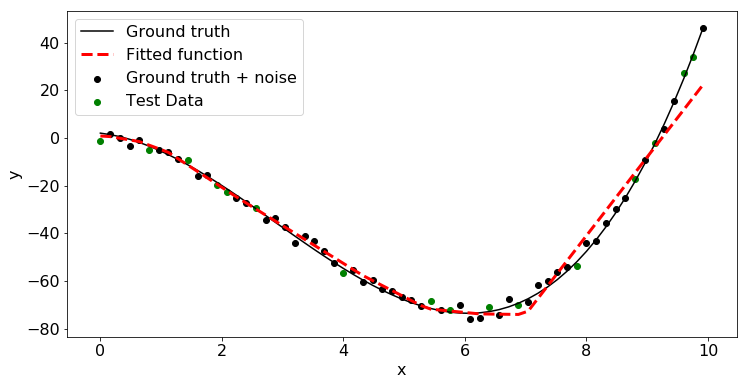

In [92]:
fig = plt.figure (figsize = (12,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x_train, y_train, label = "Ground truth + noise", color = 'black')
plt.scatter(x_val, y_val, label = "Test Data", color = 'green')
plt.plot(x, model.predict(x), color = 'red', ls = '--', lw = 3, 
         label = 'Fitted function')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

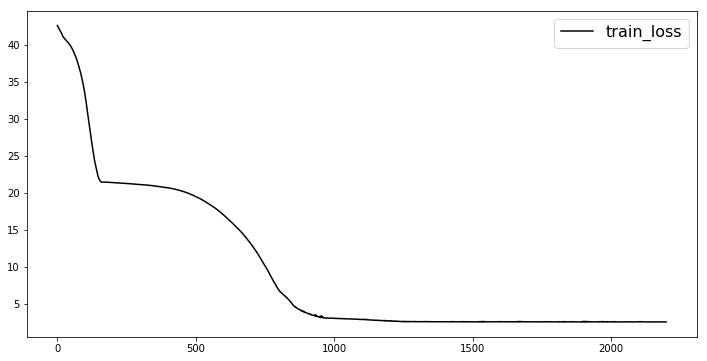

In [93]:
# The returned "history" object holds a record
# of the loss values and metric values during training
fig = plt.figure (figsize = (12,6))
plt.plot(history.history['loss'], label = "train_loss", color = 'black')
plt.legend(fontsize = 16, loc = 'upper right')
#print('\nhistory dict:', history.history)

In [94]:
xs = np.array([-1.5,-1,-0.5,-6.6,7.5])
ys = xs**3 - 4*xs**2 - 2*xs + 2
ys_noise = ys + np.random.normal(0, 1.5, size=(len(xs),))

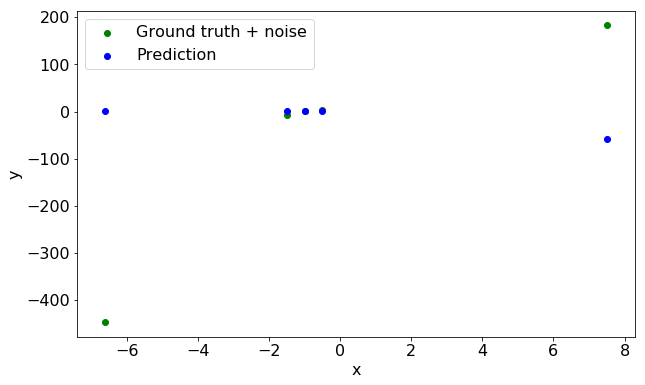

In [95]:
fig = plt.figure (figsize = (10,6))
plt.scatter(xs, ys_noise, label = "Ground truth + noise", color = 'green')
plt.scatter(xs,model.predict(xs), label = "Prediction", color = 'blue')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

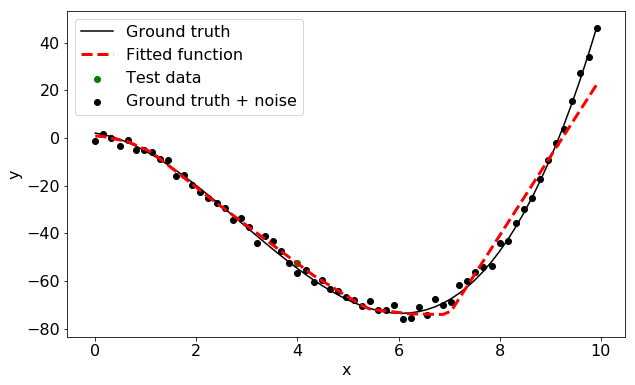

In [96]:
fig = plt.figure (figsize = (10,6))
plt.scatter([4],model.predict([4]), label = "Test data", color = 'green')
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x, y_noise, label = "Ground truth + noise", color = 'black')
plt.plot(x, model.predict(x), color = 'red', ls = '--', lw = 3, 
         label = 'Fitted function')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

## Improvement of generalization

### Regularization
L2 regularization is perhaps the most common form of regularization. It can be implemented by penalizing the squared magnitude of all parameters directly in the objective

http://rasbt.github.io/mlxtend/user_guide/general_concepts/regularization-linear/


In [99]:
model = keras.Sequential([layers.Dense(input_shape=[1], units= 20,use_bias=True,activation='relu',
                                      kernel_regularizer=keras.regularizers.l2(0.25)),
                         layers.Dense(units= 10,use_bias=True,activation='relu',
                                     kernel_regularizer=keras.regularizers.l2(0.25)),
                         layers.Dense(units= 10,use_bias=True,activation='relu',
                                     kernel_regularizer=keras.regularizers.l2(0.3)),
                         layers.Dense(units= 1,use_bias=True)])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_29 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [101]:
loss = tf.keras.losses.MAE
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)
metrics=[keras.metrics.MAE]
model.compile(loss=loss, # Loss function to minimize 
              optimizer=optimizer,# Optimizer
              metrics = metrics) # List of metrics to monitor

In [102]:
history = model.fit(x_train, y_train, epochs=2200, batch_size=47, validation_data=(x_val, y_val))

Train on 47 samples, validate on 16 samples
Epoch 1/2200
47/47 [==============================] - 0s 11ms/sample - loss: 47.9771 - mean_absolute_error: 41.4065 - val_loss: 41.5695 - val_mean_absolute_error: 35.0774
Epoch 2/2200
47/47 [==============================] - 0s 0s/sample - loss: 47.8822 - mean_absolute_error: 41.3901 - val_loss: 41.4784 - val_mean_absolute_error: 35.0641
Epoch 3/2200
47/47 [==============================] - 0s 332us/sample - loss: 47.7877 - mean_absolute_error: 41.3734 - val_loss: 41.3888 - val_mean_absolute_error: 35.0517
Epoch 4/2200
47/47 [==============================] - 0s 332us/sample - loss: 47.6952 - mean_absolute_error: 41.3580 - val_loss: 41.3008 - val_mean_absolute_error: 35.0401
Epoch 5/2200
47/47 [==============================] - 0s 0s/sample - loss: 47.6042 - mean_absolute_error: 41.3435 - val_loss: 41.2144 - val_mean_absolute_error: 35.0295
Epoch 6/2200
47/47 [==============================] - 0s 0s/sample - loss: 47.5149 - mean_absolute_erro

Epoch 49/2200
47/47 [==============================] - 0s 333us/sample - loss: 44.6329 - mean_absolute_error: 41.0930 - val_loss: 38.3105 - val_mean_absolute_error: 34.8176
Epoch 50/2200
47/47 [==============================] - 0s 332us/sample - loss: 44.5796 - mean_absolute_error: 41.0867 - val_loss: 38.2583 - val_mean_absolute_error: 34.8118
Epoch 51/2200
47/47 [==============================] - 0s 332us/sample - loss: 44.5268 - mean_absolute_error: 41.0803 - val_loss: 38.2066 - val_mean_absolute_error: 34.8059
Epoch 52/2200
47/47 [==============================] - 0s 0s/sample - loss: 44.4745 - mean_absolute_error: 41.0738 - val_loss: 38.1553 - val_mean_absolute_error: 34.7999
Epoch 53/2200
47/47 [==============================] - 0s 332us/sample - loss: 44.4226 - mean_absolute_error: 41.0672 - val_loss: 38.1046 - val_mean_absolute_error: 34.7937
Epoch 54/2200
47/47 [==============================] - 0s 333us/sample - loss: 44.3713 - mean_absolute_error: 41.0604 - val_loss: 38.0543 

Epoch 97/2200
47/47 [==============================] - 0s 332us/sample - loss: 42.4039 - mean_absolute_error: 40.5142 - val_loss: 36.1700 - val_mean_absolute_error: 34.3024
Epoch 98/2200
47/47 [==============================] - 0s 332us/sample - loss: 42.3572 - mean_absolute_error: 40.4895 - val_loss: 36.1272 - val_mean_absolute_error: 34.2811
Epoch 99/2200
47/47 [==============================] - 0s 0s/sample - loss: 42.3098 - mean_absolute_error: 40.4638 - val_loss: 36.0840 - val_mean_absolute_error: 34.2590
Epoch 100/2200
47/47 [==============================] - 0s 332us/sample - loss: 42.2620 - mean_absolute_error: 40.4370 - val_loss: 36.0404 - val_mean_absolute_error: 34.2360
Epoch 101/2200
47/47 [==============================] - 0s 332us/sample - loss: 42.2135 - mean_absolute_error: 40.4091 - val_loss: 35.9963 - val_mean_absolute_error: 34.2121
Epoch 102/2200
47/47 [==============================] - 0s 0s/sample - loss: 42.1643 - mean_absolute_error: 40.3801 - val_loss: 35.9519 

Epoch 145/2200
47/47 [==============================] - 0s 0s/sample - loss: 38.4700 - mean_absolute_error: 37.0901 - val_loss: 33.7808 - val_mean_absolute_error: 32.4004
Epoch 146/2200
47/47 [==============================] - 0s 332us/sample - loss: 38.3185 - mean_absolute_error: 36.9381 - val_loss: 33.7054 - val_mean_absolute_error: 32.3241
Epoch 147/2200
47/47 [==============================] - 0s 332us/sample - loss: 38.1781 - mean_absolute_error: 36.7968 - val_loss: 33.6282 - val_mean_absolute_error: 32.2457
Epoch 148/2200
47/47 [==============================] - 0s 0s/sample - loss: 38.0343 - mean_absolute_error: 36.6518 - val_loss: 33.5492 - val_mean_absolute_error: 32.1652
Epoch 149/2200
47/47 [==============================] - 0s 0s/sample - loss: 37.8871 - mean_absolute_error: 36.5031 - val_loss: 33.4683 - val_mean_absolute_error: 32.0824
Epoch 150/2200
47/47 [==============================] - 0s 332us/sample - loss: 37.7364 - mean_absolute_error: 36.3505 - val_loss: 33.3856 

Epoch 193/2200
47/47 [==============================] - 0s 332us/sample - loss: 28.0661 - mean_absolute_error: 26.3032 - val_loss: 30.9655 - val_mean_absolute_error: 29.1893
Epoch 194/2200
47/47 [==============================] - 0s 0s/sample - loss: 27.8505 - mean_absolute_error: 26.0743 - val_loss: 30.9454 - val_mean_absolute_error: 29.1560
Epoch 195/2200
47/47 [==============================] - 0s 332us/sample - loss: 27.6337 - mean_absolute_error: 25.8443 - val_loss: 30.9249 - val_mean_absolute_error: 29.1222
Epoch 196/2200
47/47 [==============================] - 0s 332us/sample - loss: 27.4154 - mean_absolute_error: 25.6127 - val_loss: 30.9042 - val_mean_absolute_error: 29.0882
Epoch 197/2200
47/47 [==============================] - 0s 0s/sample - loss: 27.1952 - mean_absolute_error: 25.3791 - val_loss: 30.8833 - val_mean_absolute_error: 29.0539
Epoch 198/2200
47/47 [==============================] - 0s 332us/sample - loss: 26.9727 - mean_absolute_error: 25.1433 - val_loss: 30.86

Epoch 241/2200
47/47 [==============================] - 0s 333us/sample - loss: 23.3846 - mean_absolute_error: 21.2010 - val_loss: 32.6027 - val_mean_absolute_error: 30.4233
Epoch 242/2200
47/47 [==============================] - 0s 0s/sample - loss: 23.3794 - mean_absolute_error: 21.2000 - val_loss: 32.5884 - val_mean_absolute_error: 30.4139
Epoch 243/2200
47/47 [==============================] - 0s 332us/sample - loss: 23.3720 - mean_absolute_error: 21.1975 - val_loss: 32.5673 - val_mean_absolute_error: 30.3983
Epoch 244/2200
47/47 [==============================] - 0s 332us/sample - loss: 23.3625 - mean_absolute_error: 21.1936 - val_loss: 32.5402 - val_mean_absolute_error: 30.3773
Epoch 245/2200
47/47 [==============================] - 0s 0s/sample - loss: 23.3513 - mean_absolute_error: 21.1884 - val_loss: 32.5077 - val_mean_absolute_error: 30.3514
Epoch 246/2200
47/47 [==============================] - 0s 332us/sample - loss: 23.3384 - mean_absolute_error: 21.1821 - val_loss: 32.47

Epoch 289/2200
47/47 [==============================] - 0s 332us/sample - loss: 23.1496 - mean_absolute_error: 21.1564 - val_loss: 32.0581 - val_mean_absolute_error: 30.0669
Epoch 290/2200
47/47 [==============================] - 0s 333us/sample - loss: 23.1461 - mean_absolute_error: 21.1550 - val_loss: 32.0595 - val_mean_absolute_error: 30.0705
Epoch 291/2200
47/47 [==============================] - 0s 0s/sample - loss: 23.1426 - mean_absolute_error: 21.1536 - val_loss: 32.0609 - val_mean_absolute_error: 30.0739
Epoch 292/2200
47/47 [==============================] - 0s 332us/sample - loss: 23.1391 - mean_absolute_error: 21.1521 - val_loss: 32.0623 - val_mean_absolute_error: 30.0773
Epoch 293/2200
47/47 [==============================] - 0s 332us/sample - loss: 23.1357 - mean_absolute_error: 21.1507 - val_loss: 32.0638 - val_mean_absolute_error: 30.0807
Epoch 294/2200
47/47 [==============================] - 0s 0s/sample - loss: 23.1322 - mean_absolute_error: 21.1492 - val_loss: 32.06

Epoch 337/2200
47/47 [==============================] - 0s 0s/sample - loss: 23.0053 - mean_absolute_error: 21.1151 - val_loss: 31.8805 - val_mean_absolute_error: 29.9920
Epoch 338/2200
47/47 [==============================] - 0s 332us/sample - loss: 23.0028 - mean_absolute_error: 21.1143 - val_loss: 31.8759 - val_mean_absolute_error: 29.9893
Epoch 339/2200
47/47 [==============================] - 0s 332us/sample - loss: 23.0003 - mean_absolute_error: 21.1137 - val_loss: 31.8694 - val_mean_absolute_error: 29.9849
Epoch 340/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.9976 - mean_absolute_error: 21.1131 - val_loss: 31.8613 - val_mean_absolute_error: 29.9790
Epoch 341/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.9949 - mean_absolute_error: 21.1125 - val_loss: 31.8518 - val_mean_absolute_error: 29.9718
Epoch 342/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.9921 - mean_absolute_error: 21.1121 - val_loss: 31.8435 

Epoch 385/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.8898 - mean_absolute_error: 21.0827 - val_loss: 31.6564 - val_mean_absolute_error: 29.8501
Epoch 386/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.8882 - mean_absolute_error: 21.0818 - val_loss: 31.6545 - val_mean_absolute_error: 29.8492
Epoch 387/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.8861 - mean_absolute_error: 21.0808 - val_loss: 31.6490 - val_mean_absolute_error: 29.8450
Epoch 388/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.8839 - mean_absolute_error: 21.0798 - val_loss: 31.6412 - val_mean_absolute_error: 29.8386
Epoch 389/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.8832 - mean_absolute_error: 21.0806 - val_loss: 31.6417 - val_mean_absolute_error: 29.8401
Epoch 390/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.8812 - mean_absolute_error: 21.0795 - val_loss: 31.6496 

Epoch 433/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.8040 - mean_absolute_error: 21.0426 - val_loss: 31.6300 - val_mean_absolute_error: 29.8692
Epoch 434/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.8020 - mean_absolute_error: 21.0412 - val_loss: 31.6300 - val_mean_absolute_error: 29.8700
Epoch 435/2200
47/47 [==============================] - 0s 333us/sample - loss: 22.8003 - mean_absolute_error: 21.0403 - val_loss: 31.6261 - val_mean_absolute_error: 29.8672
Epoch 436/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.7983 - mean_absolute_error: 21.0395 - val_loss: 31.6306 - val_mean_absolute_error: 29.8724
Epoch 437/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.7968 - mean_absolute_error: 21.0386 - val_loss: 31.6308 - val_mean_absolute_error: 29.8734
Epoch 438/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.7951 - mean_absolute_error: 21.0377 - val_loss: 31.6271 

Epoch 481/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.7185 - mean_absolute_error: 20.9945 - val_loss: 31.6409 - val_mean_absolute_error: 29.9173
Epoch 482/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.7169 - mean_absolute_error: 20.9933 - val_loss: 31.6388 - val_mean_absolute_error: 29.9158
Epoch 483/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.7148 - mean_absolute_error: 20.9918 - val_loss: 31.6326 - val_mean_absolute_error: 29.9105
Epoch 484/2200
47/47 [==============================] - 0s 333us/sample - loss: 22.7125 - mean_absolute_error: 20.9904 - val_loss: 31.6234 - val_mean_absolute_error: 29.9024
Epoch 485/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.7099 - mean_absolute_error: 20.9889 - val_loss: 31.6121 - val_mean_absolute_error: 29.8924
Epoch 486/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.7074 - mean_absolute_error: 20.9877 - val_loss: 31.61

Epoch 529/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.6258 - mean_absolute_error: 20.9392 - val_loss: 31.6443 - val_mean_absolute_error: 29.9580
Epoch 530/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.6225 - mean_absolute_error: 20.9361 - val_loss: 31.6659 - val_mean_absolute_error: 29.9794
Epoch 531/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.6213 - mean_absolute_error: 20.9348 - val_loss: 31.6806 - val_mean_absolute_error: 29.9942
Epoch 532/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.6202 - mean_absolute_error: 20.9338 - val_loss: 31.6882 - val_mean_absolute_error: 30.0021
Epoch 533/2200
47/47 [==============================] - 0s 333us/sample - loss: 22.6187 - mean_absolute_error: 20.9327 - val_loss: 31.6885 - val_mean_absolute_error: 30.0031
Epoch 534/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.6165 - mean_absolute_error: 20.9311 - val_loss: 31.68

Epoch 577/2200
47/47 [==============================] - 0s 333us/sample - loss: 22.5274 - mean_absolute_error: 20.8743 - val_loss: 31.6793 - val_mean_absolute_error: 30.0269
Epoch 578/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.5255 - mean_absolute_error: 20.8731 - val_loss: 31.6925 - val_mean_absolute_error: 30.0402
Epoch 579/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.5217 - mean_absolute_error: 20.8693 - val_loss: 31.7176 - val_mean_absolute_error: 30.0648
Epoch 580/2200
47/47 [==============================] - 0s 333us/sample - loss: 22.5207 - mean_absolute_error: 20.8679 - val_loss: 31.7346 - val_mean_absolute_error: 30.0818
Epoch 581/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.5196 - mean_absolute_error: 20.8667 - val_loss: 31.7443 - val_mean_absolute_error: 30.0917
Epoch 582/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.5180 - mean_absolute_error: 20.8654 - val_loss: 31.74

Epoch 625/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.4222 - mean_absolute_error: 20.7986 - val_loss: 31.7612 - val_mean_absolute_error: 30.1383
Epoch 626/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.4199 - mean_absolute_error: 20.7970 - val_loss: 31.7559 - val_mean_absolute_error: 30.1341
Epoch 627/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.4173 - mean_absolute_error: 20.7955 - val_loss: 31.7464 - val_mean_absolute_error: 30.1258
Epoch 628/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.4146 - mean_absolute_error: 20.7939 - val_loss: 31.7331 - val_mean_absolute_error: 30.1139
Epoch 629/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.4131 - mean_absolute_error: 20.7939 - val_loss: 31.7356 - val_mean_absolute_error: 30.1170
Epoch 630/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.4104 - mean_absolute_error: 20.7918 - val_loss: 31.7521 - v

Epoch 673/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.3128 - mean_absolute_error: 20.7203 - val_loss: 31.7868 - val_mean_absolute_error: 30.1943
Epoch 674/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.3082 - mean_absolute_error: 20.7156 - val_loss: 31.7967 - val_mean_absolute_error: 30.2045
Epoch 675/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.3062 - mean_absolute_error: 20.7140 - val_loss: 31.8010 - val_mean_absolute_error: 30.2093
Epoch 676/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.3041 - mean_absolute_error: 20.7124 - val_loss: 31.7993 - val_mean_absolute_error: 30.2084
Epoch 677/2200
47/47 [==============================] - 0s 333us/sample - loss: 22.3016 - mean_absolute_error: 20.7107 - val_loss: 31.7922 - val_mean_absolute_error: 30.2023
Epoch 678/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.2988 - mean_absolute_error: 20.7088 - val_loss: 31.78

Epoch 721/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.2158 - mean_absolute_error: 20.6501 - val_loss: 31.7492 - val_mean_absolute_error: 30.1840
Epoch 722/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.2141 - mean_absolute_error: 20.6489 - val_loss: 31.7534 - val_mean_absolute_error: 30.1884
Epoch 723/2200
47/47 [==============================] - 0s 333us/sample - loss: 22.2119 - mean_absolute_error: 20.6469 - val_loss: 31.7629 - val_mean_absolute_error: 30.1979
Epoch 724/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.2096 - mean_absolute_error: 20.6446 - val_loss: 31.7761 - val_mean_absolute_error: 30.2110
Epoch 725/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.2094 - mean_absolute_error: 20.6442 - val_loss: 31.7718 - val_mean_absolute_error: 30.2072
Epoch 726/2200
47/47 [==============================] - 0s 333us/sample - loss: 22.2071 - mean_absolute_error: 20.6425 - val_loss: 31.7517 - v

Epoch 769/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.1273 - mean_absolute_error: 20.5779 - val_loss: 31.6956 - val_mean_absolute_error: 30.1466
Epoch 770/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.1257 - mean_absolute_error: 20.5767 - val_loss: 31.6943 - val_mean_absolute_error: 30.1456
Epoch 771/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.1238 - mean_absolute_error: 20.5750 - val_loss: 31.6981 - val_mean_absolute_error: 30.1494
Epoch 772/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.1217 - mean_absolute_error: 20.5729 - val_loss: 31.7066 - val_mean_absolute_error: 30.1576
Epoch 773/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.1193 - mean_absolute_error: 20.5704 - val_loss: 31.7192 - val_mean_absolute_error: 30.1698
Epoch 774/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.1168 - mean_absolute_error: 20.5675 - val_loss: 31.7356 

Epoch 817/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.0308 - mean_absolute_error: 20.4913 - val_loss: 31.6851 - val_mean_absolute_error: 30.1461
Epoch 818/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.0280 - mean_absolute_error: 20.4890 - val_loss: 31.6818 - val_mean_absolute_error: 30.1431
Epoch 819/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.0260 - mean_absolute_error: 20.4873 - val_loss: 31.6855 - val_mean_absolute_error: 30.1468
Epoch 820/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.0236 - mean_absolute_error: 20.4849 - val_loss: 31.6941 - val_mean_absolute_error: 30.1553
Epoch 821/2200
47/47 [==============================] - 0s 332us/sample - loss: 22.0225 - mean_absolute_error: 20.4837 - val_loss: 31.6843 - val_mean_absolute_error: 30.1460
Epoch 822/2200
47/47 [==============================] - 0s 0s/sample - loss: 22.0193 - mean_absolute_error: 20.4810 - val_loss: 31.68

Epoch 865/2200
47/47 [==============================] - 0s 333us/sample - loss: 21.9264 - mean_absolute_error: 20.3992 - val_loss: 31.6137 - val_mean_absolute_error: 30.0863
Epoch 866/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.9237 - mean_absolute_error: 20.3963 - val_loss: 31.6267 - val_mean_absolute_error: 30.0990
Epoch 867/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.9217 - mean_absolute_error: 20.3940 - val_loss: 31.6203 - val_mean_absolute_error: 30.0929
Epoch 868/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.9187 - mean_absolute_error: 20.3913 - val_loss: 31.6202 - val_mean_absolute_error: 30.0929
Epoch 869/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.9164 - mean_absolute_error: 20.3891 - val_loss: 31.6258 - val_mean_absolute_error: 30.0983
Epoch 870/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.9150 - mean_absolute_error: 20.3875 - val_loss: 31.61

Epoch 913/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.8132 - mean_absolute_error: 20.2922 - val_loss: 31.5505 - val_mean_absolute_error: 30.0295
Epoch 914/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.8102 - mean_absolute_error: 20.2892 - val_loss: 31.5619 - val_mean_absolute_error: 30.0406
Epoch 915/2200
47/47 [==============================] - 0s 333us/sample - loss: 21.8075 - mean_absolute_error: 20.2862 - val_loss: 31.5534 - val_mean_absolute_error: 30.0325
Epoch 916/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.8048 - mean_absolute_error: 20.2839 - val_loss: 31.5517 - val_mean_absolute_error: 30.0310
Epoch 917/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.8023 - mean_absolute_error: 20.2815 - val_loss: 31.5564 - val_mean_absolute_error: 30.0354
Epoch 918/2200
47/47 [==============================] - 0s 333us/sample - loss: 21.7999 - mean_absolute_error: 20.2789 - val_loss: 31.54

Epoch 961/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.6890 - mean_absolute_error: 20.1707 - val_loss: 31.4747 - val_mean_absolute_error: 29.9571
Epoch 962/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.6866 - mean_absolute_error: 20.1689 - val_loss: 31.4685 - val_mean_absolute_error: 29.9512
Epoch 963/2200
47/47 [==============================] - 0s 333us/sample - loss: 21.6840 - mean_absolute_error: 20.1667 - val_loss: 31.4704 - val_mean_absolute_error: 29.9532
Epoch 964/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.6811 - mean_absolute_error: 20.1638 - val_loss: 31.4786 - val_mean_absolute_error: 29.9611
Epoch 965/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.6784 - mean_absolute_error: 20.1608 - val_loss: 31.4666 - val_mean_absolute_error: 29.9495
Epoch 966/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.6757 - mean_absolute_error: 20.1586 - val_loss: 31.46

Epoch 1009/2200
47/47 [==============================] - 0s 333us/sample - loss: 21.5557 - mean_absolute_error: 20.0380 - val_loss: 31.3724 - val_mean_absolute_error: 29.8553
Epoch 1010/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.5529 - mean_absolute_error: 20.0358 - val_loss: 31.3563 - val_mean_absolute_error: 29.8395
Epoch 1011/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.5510 - mean_absolute_error: 20.0343 - val_loss: 31.3496 - val_mean_absolute_error: 29.8329
Epoch 1012/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.5485 - mean_absolute_error: 20.0318 - val_loss: 31.3527 - val_mean_absolute_error: 29.8359
Epoch 1013/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.5451 - mean_absolute_error: 20.0282 - val_loss: 31.3646 - val_mean_absolute_error: 29.8474
Epoch 1014/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.5408 - mean_absolute_error: 20.0237 - val_loss:

Epoch 1057/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.4114 - mean_absolute_error: 19.8917 - val_loss: 31.2908 - val_mean_absolute_error: 29.7705
Epoch 1058/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.4088 - mean_absolute_error: 19.8886 - val_loss: 31.2742 - val_mean_absolute_error: 29.7541
Epoch 1059/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.4032 - mean_absolute_error: 19.8831 - val_loss: 31.2402 - val_mean_absolute_error: 29.7209
Epoch 1060/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.4008 - mean_absolute_error: 19.8814 - val_loss: 31.2178 - val_mean_absolute_error: 29.6988
Epoch 1061/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.3990 - mean_absolute_error: 19.8800 - val_loss: 31.2056 - val_mean_absolute_error: 29.6867
Epoch 1062/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.3963 - mean_absolute_error: 19.8774 - val_loss:

Epoch 1105/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.2488 - mean_absolute_error: 19.7220 - val_loss: 31.1215 - val_mean_absolute_error: 29.5939
Epoch 1106/2200
47/47 [==============================] - 0s 333us/sample - loss: 21.2445 - mean_absolute_error: 19.7169 - val_loss: 31.1396 - val_mean_absolute_error: 29.6108
Epoch 1107/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.2446 - mean_absolute_error: 19.7158 - val_loss: 31.1247 - val_mean_absolute_error: 29.5960
Epoch 1108/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.2388 - mean_absolute_error: 19.7102 - val_loss: 31.0801 - val_mean_absolute_error: 29.5528
Epoch 1109/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.2355 - mean_absolute_error: 19.7081 - val_loss: 31.0482 - val_mean_absolute_error: 29.5218
Epoch 1110/2200
47/47 [==============================] - 0s 333us/sample - loss: 21.2335 - mean_absolute_error: 19.7071 - val_loss:

Epoch 1153/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.0734 - mean_absolute_error: 19.5330 - val_loss: 30.8759 - val_mean_absolute_error: 29.3358
Epoch 1154/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.0708 - mean_absolute_error: 19.5307 - val_loss: 30.8608 - val_mean_absolute_error: 29.3206
Epoch 1155/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.0675 - mean_absolute_error: 19.5273 - val_loss: 30.8557 - val_mean_absolute_error: 29.3150
Epoch 1156/2200
47/47 [==============================] - 0s 332us/sample - loss: 21.0635 - mean_absolute_error: 19.5228 - val_loss: 30.8595 - val_mean_absolute_error: 29.3180
Epoch 1157/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.0588 - mean_absolute_error: 19.5173 - val_loss: 30.8714 - val_mean_absolute_error: 29.3289
Epoch 1158/2200
47/47 [==============================] - 0s 0s/sample - loss: 21.0536 - mean_absolute_error: 19.5111 - val_loss: 30.89

Epoch 1201/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.8736 - mean_absolute_error: 19.3109 - val_loss: 30.7018 - val_mean_absolute_error: 29.1377
Epoch 1202/2200
47/47 [==============================] - 0s 0s/sample - loss: 20.8684 - mean_absolute_error: 19.3043 - val_loss: 30.7124 - val_mean_absolute_error: 29.1474
Epoch 1203/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.8640 - mean_absolute_error: 19.2990 - val_loss: 30.7186 - val_mean_absolute_error: 29.1530
Epoch 1204/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.8613 - mean_absolute_error: 19.2957 - val_loss: 30.6905 - val_mean_absolute_error: 29.1255
Epoch 1205/2200
47/47 [==============================] - 0s 0s/sample - loss: 20.8551 - mean_absolute_error: 19.2901 - val_loss: 30.6725 - val_mean_absolute_error: 29.1075
Epoch 1206/2200
47/47 [==============================] - 0s 333us/sample - loss: 20.8513 - mean_absolute_error: 19.2863 - val_loss:

47/47 [==============================] - 0s 332us/sample - loss: 20.6542 - mean_absolute_error: 19.0639 - val_loss: 30.4102 - val_mean_absolute_error: 28.8195
Epoch 1249/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.6499 - mean_absolute_error: 19.0592 - val_loss: 30.4066 - val_mean_absolute_error: 28.8153
Epoch 1250/2200
47/47 [==============================] - 0s 0s/sample - loss: 20.6447 - mean_absolute_error: 19.0534 - val_loss: 30.4132 - val_mean_absolute_error: 28.8211
Epoch 1251/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.6387 - mean_absolute_error: 19.0466 - val_loss: 30.4291 - val_mean_absolute_error: 28.8359
Epoch 1252/2200
47/47 [==============================] - 0s 333us/sample - loss: 20.6323 - mean_absolute_error: 19.0391 - val_loss: 30.4521 - val_mean_absolute_error: 28.8575
Epoch 1253/2200
47/47 [==============================] - 0s 0s/sample - loss: 20.6261 - mean_absolute_error: 19.0315 - val_loss: 30.4500 - val_m

Epoch 1296/2200
47/47 [==============================] - 0s 0s/sample - loss: 20.3965 - mean_absolute_error: 18.7758 - val_loss: 30.1211 - val_mean_absolute_error: 28.5002
Epoch 1297/2200
47/47 [==============================] - 0s 333us/sample - loss: 20.3913 - mean_absolute_error: 18.7704 - val_loss: 30.1159 - val_mean_absolute_error: 28.4945
Epoch 1298/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.3856 - mean_absolute_error: 18.7642 - val_loss: 30.1194 - val_mean_absolute_error: 28.4972
Epoch 1299/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.3793 - mean_absolute_error: 18.7571 - val_loss: 30.1310 - val_mean_absolute_error: 28.5074
Epoch 1300/2200
47/47 [==============================] - 0s 0s/sample - loss: 20.3727 - mean_absolute_error: 18.7492 - val_loss: 30.1484 - val_mean_absolute_error: 28.5231
Epoch 1301/2200
47/47 [==============================] - 0s 333us/sample - loss: 20.3658 - mean_absolute_error: 18.7405 - val_loss:

Epoch 1344/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.0978 - mean_absolute_error: 18.4340 - val_loss: 29.8488 - val_mean_absolute_error: 28.1842
Epoch 1345/2200
47/47 [==============================] - 0s 0s/sample - loss: 20.0911 - mean_absolute_error: 18.4266 - val_loss: 29.8402 - val_mean_absolute_error: 28.1745
Epoch 1346/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.0846 - mean_absolute_error: 18.4189 - val_loss: 29.8421 - val_mean_absolute_error: 28.1750
Epoch 1347/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.0774 - mean_absolute_error: 18.4103 - val_loss: 29.8534 - val_mean_absolute_error: 28.1846
Epoch 1348/2200
47/47 [==============================] - 0s 0s/sample - loss: 20.0720 - mean_absolute_error: 18.4032 - val_loss: 29.8289 - val_mean_absolute_error: 28.1598
Epoch 1349/2200
47/47 [==============================] - 0s 332us/sample - loss: 20.0639 - mean_absolute_error: 18.3948 - val_loss:

Epoch 1392/2200
47/47 [==============================] - 0s 332us/sample - loss: 19.7545 - mean_absolute_error: 18.0472 - val_loss: 29.4133 - val_mean_absolute_error: 27.7049
Epoch 1393/2200
47/47 [==============================] - 0s 332us/sample - loss: 19.7458 - mean_absolute_error: 18.0373 - val_loss: 29.4286 - val_mean_absolute_error: 27.7187
Epoch 1394/2200
47/47 [==============================] - 0s 0s/sample - loss: 19.7365 - mean_absolute_error: 18.0266 - val_loss: 29.4515 - val_mean_absolute_error: 27.7398
Epoch 1395/2200
47/47 [==============================] - 0s 332us/sample - loss: 19.7332 - mean_absolute_error: 18.0215 - val_loss: 29.4452 - val_mean_absolute_error: 27.7321
Epoch 1396/2200
47/47 [==============================] - 0s 332us/sample - loss: 19.7254 - mean_absolute_error: 18.0123 - val_loss: 29.4143 - val_mean_absolute_error: 27.7003
Epoch 1397/2200
47/47 [==============================] - 0s 332us/sample - loss: 19.7137 - mean_absolute_error: 17.9997 - val_lo

Epoch 1440/2200
47/47 [==============================] - 0s 333us/sample - loss: 19.3410 - mean_absolute_error: 17.5695 - val_loss: 28.9352 - val_mean_absolute_error: 27.1623
Epoch 1441/2200
47/47 [==============================] - 0s 332us/sample - loss: 19.3316 - mean_absolute_error: 17.5588 - val_loss: 28.9284 - val_mean_absolute_error: 27.1537
Epoch 1442/2200
47/47 [==============================] - 0s 0s/sample - loss: 19.3215 - mean_absolute_error: 17.5469 - val_loss: 28.9309 - val_mean_absolute_error: 27.1541
Epoch 1443/2200
47/47 [==============================] - 0s 332us/sample - loss: 19.3108 - mean_absolute_error: 17.5340 - val_loss: 28.9421 - val_mean_absolute_error: 27.1626
Epoch 1444/2200
47/47 [==============================] - 0s 332us/sample - loss: 19.3007 - mean_absolute_error: 17.5212 - val_loss: 28.9489 - val_mean_absolute_error: 27.1674
Epoch 1445/2200
47/47 [==============================] - 0s 0s/sample - loss: 19.2927 - mean_absolute_error: 17.5111 - val_loss:

47/47 [==============================] - 0s 332us/sample - loss: 18.7108 - mean_absolute_error: 16.7882 - val_loss: 28.1882 - val_mean_absolute_error: 26.2605
Epoch 1488/2200
47/47 [==============================] - 0s 0s/sample - loss: 18.6922 - mean_absolute_error: 16.7646 - val_loss: 28.1402 - val_mean_absolute_error: 26.2068
Epoch 1489/2200
47/47 [==============================] - 0s 332us/sample - loss: 18.6742 - mean_absolute_error: 16.7407 - val_loss: 28.0899 - val_mean_absolute_error: 26.1509
Epoch 1490/2200
47/47 [==============================] - 0s 332us/sample - loss: 18.6562 - mean_absolute_error: 16.7172 - val_loss: 28.0371 - val_mean_absolute_error: 26.0929
Epoch 1491/2200
47/47 [==============================] - 0s 332us/sample - loss: 18.6376 - mean_absolute_error: 16.6934 - val_loss: 27.9942 - val_mean_absolute_error: 26.0441
Epoch 1492/2200
47/47 [==============================] - 0s 0s/sample - loss: 18.6189 - mean_absolute_error: 16.6688 - val_loss: 27.9478 - val_m

Epoch 1535/2200
47/47 [==============================] - 0s 332us/sample - loss: 17.6235 - mean_absolute_error: 15.3326 - val_loss: 26.4798 - val_mean_absolute_error: 24.1788
Epoch 1536/2200
47/47 [==============================] - 0s 333us/sample - loss: 17.5953 - mean_absolute_error: 15.2943 - val_loss: 26.4420 - val_mean_absolute_error: 24.1301
Epoch 1537/2200
47/47 [==============================] - 0s 0s/sample - loss: 17.5654 - mean_absolute_error: 15.2535 - val_loss: 26.3969 - val_mean_absolute_error: 24.0734
Epoch 1538/2200
47/47 [==============================] - 0s 0s/sample - loss: 17.5372 - mean_absolute_error: 15.2137 - val_loss: 26.3962 - val_mean_absolute_error: 24.0616
Epoch 1539/2200
47/47 [==============================] - 0s 332us/sample - loss: 17.5072 - mean_absolute_error: 15.1725 - val_loss: 26.3744 - val_mean_absolute_error: 24.0289
Epoch 1540/2200
47/47 [==============================] - 0s 332us/sample - loss: 17.4783 - mean_absolute_error: 15.1327 - val_loss:

Epoch 1583/2200
47/47 [==============================] - 0s 333us/sample - loss: 15.9946 - mean_absolute_error: 13.1103 - val_loss: 24.4154 - val_mean_absolute_error: 21.5147
Epoch 1584/2200
47/47 [==============================] - 0s 0s/sample - loss: 15.9840 - mean_absolute_error: 13.0832 - val_loss: 24.3558 - val_mean_absolute_error: 21.4393
Epoch 1585/2200
47/47 [==============================] - 0s 332us/sample - loss: 15.9438 - mean_absolute_error: 13.0273 - val_loss: 24.4035 - val_mean_absolute_error: 21.4720
Epoch 1586/2200
47/47 [==============================] - 0s 332us/sample - loss: 15.8845 - mean_absolute_error: 12.9530 - val_loss: 24.4981 - val_mean_absolute_error: 21.5513
Epoch 1587/2200
47/47 [==============================] - 0s 0s/sample - loss: 15.8751 - mean_absolute_error: 12.9284 - val_loss: 24.4801 - val_mean_absolute_error: 21.5184
Epoch 1588/2200
47/47 [==============================] - 0s 0s/sample - loss: 15.8435 - mean_absolute_error: 12.8819 - val_loss: 24

Epoch 1631/2200
47/47 [==============================] - 0s 332us/sample - loss: 13.7980 - mean_absolute_error: 10.0455 - val_loss: 21.5192 - val_mean_absolute_error: 17.7507
Epoch 1632/2200
47/47 [==============================] - 0s 332us/sample - loss: 13.7589 - mean_absolute_error: 9.9904 - val_loss: 21.4663 - val_mean_absolute_error: 17.6833
Epoch 1633/2200
47/47 [==============================] - 0s 0s/sample - loss: 13.7163 - mean_absolute_error: 9.9333 - val_loss: 21.4691 - val_mean_absolute_error: 17.6704
Epoch 1634/2200
47/47 [==============================] - 0s 0s/sample - loss: 13.6691 - mean_absolute_error: 9.8703 - val_loss: 21.4103 - val_mean_absolute_error: 17.5951
Epoch 1635/2200
47/47 [==============================] - 0s 332us/sample - loss: 13.6209 - mean_absolute_error: 9.8057 - val_loss: 21.2755 - val_mean_absolute_error: 17.4429
Epoch 1636/2200
47/47 [==============================] - 0s 332us/sample - loss: 13.5749 - mean_absolute_error: 9.7424 - val_loss: 21.2

Epoch 1679/2200
47/47 [==============================] - 0s 332us/sample - loss: 11.8607 - mean_absolute_error: 7.3672 - val_loss: 18.2619 - val_mean_absolute_error: 13.7521
Epoch 1680/2200
47/47 [==============================] - 0s 0s/sample - loss: 11.8513 - mean_absolute_error: 7.3415 - val_loss: 18.2281 - val_mean_absolute_error: 13.7017
Epoch 1681/2200
47/47 [==============================] - 0s 0s/sample - loss: 11.8384 - mean_absolute_error: 7.3119 - val_loss: 18.0222 - val_mean_absolute_error: 13.4807
Epoch 1682/2200
47/47 [==============================] - 0s 332us/sample - loss: 11.7523 - mean_absolute_error: 7.2107 - val_loss: 17.7435 - val_mean_absolute_error: 13.1845
Epoch 1683/2200
47/47 [==============================] - 0s 332us/sample - loss: 11.6754 - mean_absolute_error: 7.1164 - val_loss: 17.5721 - val_mean_absolute_error: 12.9952
Epoch 1684/2200
47/47 [==============================] - 0s 0s/sample - loss: 11.6906 - mean_absolute_error: 7.1137 - val_loss: 17.6472 

Epoch 1727/2200
47/47 [==============================] - 0s 332us/sample - loss: 10.7039 - mean_absolute_error: 5.8383 - val_loss: 15.8943 - val_mean_absolute_error: 11.0173
Epoch 1728/2200
47/47 [==============================] - 0s 332us/sample - loss: 10.6770 - mean_absolute_error: 5.8000 - val_loss: 15.9988 - val_mean_absolute_error: 11.1117
Epoch 1729/2200
47/47 [==============================] - 0s 0s/sample - loss: 10.6942 - mean_absolute_error: 5.8071 - val_loss: 15.9613 - val_mean_absolute_error: 11.0698
Epoch 1730/2200
47/47 [==============================] - 0s 0s/sample - loss: 10.6579 - mean_absolute_error: 5.7664 - val_loss: 15.8396 - val_mean_absolute_error: 10.9462
Epoch 1731/2200
47/47 [==============================] - 0s 333us/sample - loss: 10.6334 - mean_absolute_error: 5.7400 - val_loss: 15.6993 - val_mean_absolute_error: 10.8014
Epoch 1732/2200
47/47 [==============================] - 0s 332us/sample - loss: 10.6346 - mean_absolute_error: 5.7367 - val_loss: 15.67

Epoch 1775/2200
47/47 [==============================] - 0s 332us/sample - loss: 9.9362 - mean_absolute_error: 4.7740 - val_loss: 14.6892 - val_mean_absolute_error: 9.5224
Epoch 1776/2200
47/47 [==============================] - 0s 0s/sample - loss: 9.8938 - mean_absolute_error: 4.7269 - val_loss: 14.2814 - val_mean_absolute_error: 9.1109
Epoch 1777/2200
47/47 [==============================] - 0s 332us/sample - loss: 9.9032 - mean_absolute_error: 4.7327 - val_loss: 14.3138 - val_mean_absolute_error: 9.1410
Epoch 1778/2200
47/47 [==============================] - 0s 333us/sample - loss: 9.8775 - mean_absolute_error: 4.7047 - val_loss: 14.4197 - val_mean_absolute_error: 9.2439
Epoch 1779/2200
47/47 [==============================] - 0s 0s/sample - loss: 9.8585 - mean_absolute_error: 4.6827 - val_loss: 14.5863 - val_mean_absolute_error: 9.4068
Epoch 1780/2200
47/47 [==============================] - 0s 332us/sample - loss: 9.8460 - mean_absolute_error: 4.6666 - val_loss: 14.5300 - val_me

Epoch 1823/2200
47/47 [==============================] - 0s 332us/sample - loss: 9.4284 - mean_absolute_error: 4.2371 - val_loss: 13.5967 - val_mean_absolute_error: 8.4094
Epoch 1824/2200
47/47 [==============================] - 0s 332us/sample - loss: 9.4362 - mean_absolute_error: 4.2489 - val_loss: 13.4847 - val_mean_absolute_error: 8.2995
Epoch 1825/2200
47/47 [==============================] - 0s 0s/sample - loss: 9.4394 - mean_absolute_error: 4.2542 - val_loss: 13.5377 - val_mean_absolute_error: 8.3530
Epoch 1826/2200
47/47 [==============================] - 0s 332us/sample - loss: 9.4222 - mean_absolute_error: 4.2374 - val_loss: 13.7533 - val_mean_absolute_error: 8.5675
Epoch 1827/2200
47/47 [==============================] - 0s 333us/sample - loss: 9.3882 - mean_absolute_error: 4.2025 - val_loss: 14.0089 - val_mean_absolute_error: 8.8222
Epoch 1828/2200
47/47 [==============================] - 0s 0s/sample - loss: 9.4215 - mean_absolute_error: 4.2348 - val_loss: 13.9143 - val_me

Epoch 1871/2200
47/47 [==============================] - 0s 0s/sample - loss: 9.1032 - mean_absolute_error: 3.9921 - val_loss: 13.1194 - val_mean_absolute_error: 8.0105
Epoch 1872/2200
47/47 [==============================] - 0s 332us/sample - loss: 9.0899 - mean_absolute_error: 3.9809 - val_loss: 13.2371 - val_mean_absolute_error: 8.1310
Epoch 1873/2200
47/47 [==============================] - 0s 332us/sample - loss: 9.0984 - mean_absolute_error: 3.9923 - val_loss: 13.1890 - val_mean_absolute_error: 8.0872
Epoch 1874/2200
47/47 [==============================] - 0s 0s/sample - loss: 9.0872 - mean_absolute_error: 3.9855 - val_loss: 13.0623 - val_mean_absolute_error: 7.9653
Epoch 1875/2200
47/47 [==============================] - 0s 332us/sample - loss: 9.0846 - mean_absolute_error: 3.9875 - val_loss: 13.0159 - val_mean_absolute_error: 7.9203
Epoch 1876/2200
47/47 [==============================] - 0s 333us/sample - loss: 9.0798 - mean_absolute_error: 3.9842 - val_loss: 13.0472 - val_me

Epoch 1919/2200
47/47 [==============================] - 0s 333us/sample - loss: 8.8481 - mean_absolute_error: 3.8134 - val_loss: 12.6246 - val_mean_absolute_error: 7.5893
Epoch 1920/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.8430 - mean_absolute_error: 3.8077 - val_loss: 12.6235 - val_mean_absolute_error: 7.5884
Epoch 1921/2200
47/47 [==============================] - 0s 0s/sample - loss: 8.8405 - mean_absolute_error: 3.8054 - val_loss: 12.5411 - val_mean_absolute_error: 7.5078
Epoch 1922/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.8333 - mean_absolute_error: 3.8000 - val_loss: 12.4760 - val_mean_absolute_error: 7.4451
Epoch 1923/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.8334 - mean_absolute_error: 3.8025 - val_loss: 12.7149 - val_mean_absolute_error: 7.6849
Epoch 1924/2200
47/47 [==============================] - 0s 0s/sample - loss: 8.8315 - mean_absolute_error: 3.8015 - val_loss: 12.7728 - val_me

Epoch 1967/2200
47/47 [==============================] - 0s 0s/sample - loss: 8.6201 - mean_absolute_error: 3.6084 - val_loss: 12.4424 - val_mean_absolute_error: 7.4292
Epoch 1968/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.6292 - mean_absolute_error: 3.6160 - val_loss: 12.5539 - val_mean_absolute_error: 7.5404
Epoch 1969/2200
47/47 [==============================] - 0s 333us/sample - loss: 8.6345 - mean_absolute_error: 3.6211 - val_loss: 12.4384 - val_mean_absolute_error: 7.4246
Epoch 1970/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.6207 - mean_absolute_error: 3.6069 - val_loss: 12.1780 - val_mean_absolute_error: 7.1636
Epoch 1971/2200
47/47 [==============================] - 0s 0s/sample - loss: 8.5923 - mean_absolute_error: 3.5779 - val_loss: 11.9069 - val_mean_absolute_error: 6.8909
Epoch 1972/2200
47/47 [==============================] - 0s 333us/sample - loss: 8.6782 - mean_absolute_error: 3.6622 - val_loss: 12.3723 - val_me

Epoch 2015/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.4012 - mean_absolute_error: 3.3841 - val_loss: 11.7705 - val_mean_absolute_error: 6.7541
Epoch 2016/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.4168 - mean_absolute_error: 3.4005 - val_loss: 12.1326 - val_mean_absolute_error: 7.1167
Epoch 2017/2200
47/47 [==============================] - 0s 0s/sample - loss: 8.4130 - mean_absolute_error: 3.3970 - val_loss: 12.2725 - val_mean_absolute_error: 7.2566
Epoch 2018/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.4214 - mean_absolute_error: 3.4054 - val_loss: 12.2131 - val_mean_absolute_error: 7.1968
Epoch 2019/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.4122 - mean_absolute_error: 3.3959 - val_loss: 11.9741 - val_mean_absolute_error: 6.9572
Epoch 2020/2200
47/47 [==============================] - 0s 0s/sample - loss: 8.3872 - mean_absolute_error: 3.3703 - val_loss: 11.5733 - val_me

Epoch 2063/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.2617 - mean_absolute_error: 3.3067 - val_loss: 11.9320 - val_mean_absolute_error: 6.9788
Epoch 2064/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.2472 - mean_absolute_error: 3.2940 - val_loss: 12.0001 - val_mean_absolute_error: 7.0478
Epoch 2065/2200
47/47 [==============================] - 0s 0s/sample - loss: 8.2504 - mean_absolute_error: 3.2981 - val_loss: 11.9337 - val_mean_absolute_error: 6.9818
Epoch 2066/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.2430 - mean_absolute_error: 3.2911 - val_loss: 11.7516 - val_mean_absolute_error: 6.8007
Epoch 2067/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.2314 - mean_absolute_error: 3.2804 - val_loss: 11.7350 - val_mean_absolute_error: 6.7851
Epoch 2068/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.2289 - mean_absolute_error: 3.2790 - val_loss: 12.0714 - val

Epoch 2111/2200
47/47 [==============================] - 0s 0s/sample - loss: 8.1245 - mean_absolute_error: 3.2202 - val_loss: 11.5329 - val_mean_absolute_error: 6.6305
Epoch 2112/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.1084 - mean_absolute_error: 3.2060 - val_loss: 11.5764 - val_mean_absolute_error: 6.6760
Epoch 2113/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.0955 - mean_absolute_error: 3.1951 - val_loss: 11.6836 - val_mean_absolute_error: 6.7850
Epoch 2114/2200
47/47 [==============================] - 0s 0s/sample - loss: 8.1019 - mean_absolute_error: 3.2032 - val_loss: 11.4965 - val_mean_absolute_error: 6.5992
Epoch 2115/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.1067 - mean_absolute_error: 3.2093 - val_loss: 11.6510 - val_mean_absolute_error: 6.7545
Epoch 2116/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.0912 - mean_absolute_error: 3.1947 - val_loss: 11.5075 - val_me

Epoch 2159/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.0056 - mean_absolute_error: 3.2095 - val_loss: 11.7113 - val_mean_absolute_error: 6.9166
Epoch 2160/2200
47/47 [==============================] - 0s 0s/sample - loss: 8.0085 - mean_absolute_error: 3.2137 - val_loss: 11.4959 - val_mean_absolute_error: 6.7029
Epoch 2161/2200
47/47 [==============================] - 0s 332us/sample - loss: 7.9846 - mean_absolute_error: 3.1916 - val_loss: 11.3655 - val_mean_absolute_error: 6.5747
Epoch 2162/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.0144 - mean_absolute_error: 3.2236 - val_loss: 11.5132 - val_mean_absolute_error: 6.7242
Epoch 2163/2200
47/47 [==============================] - 0s 0s/sample - loss: 7.9782 - mean_absolute_error: 3.1891 - val_loss: 11.7534 - val_mean_absolute_error: 6.9652
Epoch 2164/2200
47/47 [==============================] - 0s 332us/sample - loss: 8.0144 - mean_absolute_error: 3.2262 - val_loss: 11.7365 - val_me

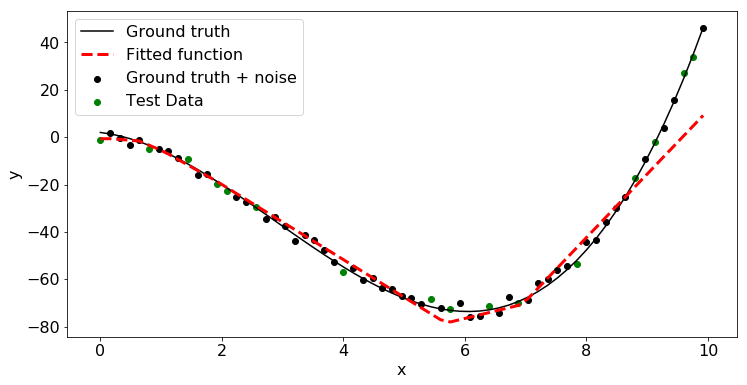

In [103]:
fig = plt.figure (figsize = (12,6))
plt.plot(x,y, label = "Ground truth", color = 'black')
plt.scatter(x_train, y_train, label = "Ground truth + noise", color = 'black')
plt.scatter(x_val, y_val, label = "Test Data", color = 'green')
plt.plot(x, model.predict(x), color = 'red', ls = '--', lw = 3, 
         label = 'Fitted function')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlabel ('x', fontsize = 16)
plt.ylabel ('y', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)

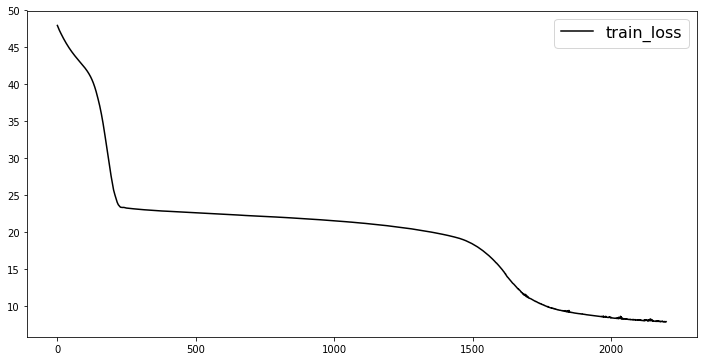

In [104]:
# The returned "history" object holds a record
# of the loss values and metric values during training
fig = plt.figure (figsize = (12,6))
plt.plot(history.history['loss'], label = "train_loss", color = 'black')
plt.legend(fontsize = 16, loc = 'upper right')
#print('\nhistory dict:', history.history)

In [105]:
display(Image(url='./image67.gif',width=500))

NameError: name 'Image' is not defined